In [1]:
#Import libraries
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
import xgboost as XGB

#Select sampling technique
samp = 'Undersampling' #None, Oversampling, Undersampling


# 1 Import data

In [ ]:
#Select sampling technique
samp = 'Undersampling' #None, Oversampling, Undersampling

#Specify filename
sel_train = 'A'
sel_test = 'B'
sel_unseen = 'C'

#Read file
df_final_train = pd.read_pickle('df_final_short_' + sel_train + '.pkl')
df_final_train = df_final_train.drop(['Length_of_staymean', 'Patient'], axis=1)

df_final_test = pd.read_pickle('df_final_short_' + sel_test + '.pkl')
df_final_test = df_final_test.drop(['Length_of_staymean', 'Patient'], axis=1)

df_final_unseen = pd.read_pickle('df_final_short_' + sel_unseen + '.pkl')
df_final_unseen = df_final_unseen.drop(['Length_of_staymean', 'Patient'], axis=1)


In [ ]:
#View column names
pd.DataFrame({'Train': df_final_train.columns.values,
              'Test': df_final_test.columns.values,
              'Unseen': df_final_unseen.columns.values}).head(1)

In [ ]:
#Count values
pd.concat({'Train': pd.DataFrame(df_final_train['In-hospital_deathmax'].value_counts()),
           'Test': pd.DataFrame(df_final_test['In-hospital_deathmax'].value_counts()),
           'Unseen': pd.DataFrame(df_final_unseen['In-hospital_deathmax'].value_counts())
          }, axis=1)

In [ ]:
#View data
pd.concat({'Train': df_final_train.head(2),
           'Test': df_final_test.head(2),
           'Unseen': df_final_unseen.head(2)
          })

In [ ]:
#View data (number of missing values)
pd.DataFrame({'Train': (df_final_train.isna().sum()/df_final_train.shape[0]).sort_values(ascending = False),
              'Test': (df_final_test.isna().sum()/df_final_test.shape[0]).sort_values(ascending = False),
              'Unseen': (df_final_test.isna().sum()/df_final_test.shape[0]).sort_values(ascending = False)
             }).head(1)

In [ ]:
#Select categorical variables
cat_list = df_final_train.select_dtypes('category').columns
# cat_list = [
# #         'Survivalmean', 
# #         'Length_of_staymean',
#           'In-hospital_deathmax',
#           'ICUTypemax',
#           'Hypertension', 
#           'Tachycardia', 
#           'GCSComa', 
#           'GCSmin',
#           'Diabetes', 
#           'Hyperglycemia',
#           'Hypoglycemia', 
#           'Renal Injury',
#           'BMI_Cat',
#           'MechVentmax',
#           'Genderfirst'
# #           'Patient'
# ]

#Convert float to int to category
df_final_train[cat_list] = df_final_train[cat_list].astype(int).astype('category')
df_final_test[cat_list] = df_final_test[cat_list].astype(int).astype('category')
df_final_unseen[cat_list] = df_final_unseen[cat_list].astype(int).astype('category')

#view data
pd.concat({'Train': df_final_train.head(2),
           'Test': df_final_test.head(2),
           'Unseen': df_final_unseen.head(2)
          })

In [ ]:
#Check data type
pd.DataFrame({'Train': df_final_train.dtypes,
              'Test': df_final_test.dtypes,
              'Unseen': df_final_unseen.dtypes
             }).head(1)

In [ ]:
#Select numeric variables
num_list = list(set(df_final_train.columns).difference(set(cat_list)))

In [ ]:
#Check total number of columns
pd.DataFrame({'Train': ['Y' if(len(cat_list)+len(num_list) == df_final_train.shape[1]) else 'N'],
              'Test': ['Y' if(len(cat_list)+len(num_list) == df_final_test.shape[1]) else 'N'],
              'Unseen': ['Y' if(len(cat_list)+len(num_list) == df_final_unseen.shape[1]) else 'N']
             }).head(1)

In [ ]:
#Check columns
pd.DataFrame({'Train': df_final_train.columns.values,
              'Test': df_final_test.columns.values,
              'Unseen': df_final_unseen.columns.values
             }).head(1)

# 2 Sampling

In [ ]:
#Create copy of data
df_train_encode = df_final_train
df_test_encode = df_final_test
df_unseen_encode = df_final_unseen

In [ ]:
#Check values
pd.DataFrame({'Train': df_train_encode.columns.values,
              'Test': df_test_encode.columns.values,
              'Unseen': df_unseen_encode.columns.values
             }).head(1)

In [ ]:
#Select variable type with Logistic Regression
cols = [i for i in df_train_encode.columns if i not in ['In-hospital_deathmax']]
X_train_num = df_train_encode.select_dtypes(np.number)
X_train_cat = df_train_encode[cols].select_dtypes('category')
y_train = df_train_encode['In-hospital_deathmax']

#Reorder columns
df_train_encode_scaled = pd.concat([X_train_num, X_train_cat, y_train], axis=1)


#Select variable type with Logistic Regression
cols = [i for i in df_test_encode.columns if i not in ['In-hospital_deathmax']]
X_test_num = df_test_encode.select_dtypes(np.number)
X_test_cat = df_test_encode[cols].select_dtypes('category')
y_test = df_test_encode['In-hospital_deathmax']

#Reorder columns
df_test_encode_scaled = pd.concat([X_test_num, X_test_cat, y_test], axis=1)


#Select variable type with Logistic Regression
cols = [i for i in df_unseen_encode.columns if i not in ['In-hospital_deathmax']]
X_unseen_num = df_unseen_encode.select_dtypes(np.number)
X_unseen_cat = df_unseen_encode[cols].select_dtypes('category')
y_unseen = df_unseen_encode['In-hospital_deathmax']

#Reorder columns
df_unseen_encode_scaled = pd.concat([X_unseen_num, X_unseen_cat, y_unseen], axis=1)

#View data
pd.concat({'Train': df_train_encode_scaled.head(2),
           'Test': df_test_encode_scaled.head(2),
           'Unseen': df_unseen_encode_scaled.head(2)
          })

In [ ]:
#Select relevant columns
df_train_encode_scaled_logR = pd.concat([df_train_encode_scaled.filter(regex=(".*median")), df_train_encode_scaled[['Agemean', 'In-hospital_deathmax', 'new_Heightfirst', 'new_Weightfirst', 'Urinemean48h', 
                                                                'MeanMAPfirst', 'MeanDiasABPfirst', 'MeanSysABPfirst',
                                                                'Hypertension', 'Tachycardia', 'GCSmin', 'GCSComa', 'Diabetes', 
                                                                'Hyperglycemia', 'Hypoglycemia', 'Renal Injury', 'BMI_Cat', 'MechVentmax', 'ICUTypemax', 'Genderfirst']]], sort=False, axis=1)

#Select relevant columns
df_test_encode_scaled_logR = pd.concat([df_test_encode_scaled.filter(regex=(".*median")), df_test_encode_scaled[['Agemean', 'In-hospital_deathmax', 'new_Heightfirst', 'new_Weightfirst', 'Urinemean48h', 
                                                                'MeanMAPfirst', 'MeanDiasABPfirst', 'MeanSysABPfirst',
                                                                'Hypertension', 'Tachycardia', 'GCSmin', 'GCSComa', 'Diabetes', 
                                                                'Hyperglycemia', 'Hypoglycemia', 'Renal Injury', 'BMI_Cat', 'MechVentmax', 'ICUTypemax', 'Genderfirst']]], sort=False, axis=1)

#Select relevant columns
df_unseen_encode_scaled_logR = pd.concat([df_unseen_encode_scaled.filter(regex=(".*median")), df_unseen_encode_scaled[['Agemean', 'In-hospital_deathmax', 'new_Heightfirst', 'new_Weightfirst', 'Urinemean48h', 
                                                                'MeanMAPfirst', 'MeanDiasABPfirst', 'MeanSysABPfirst',
                                                                'Hypertension', 'Tachycardia', 'GCSmin', 'GCSComa', 'Diabetes', 
                                                                'Hyperglycemia', 'Hypoglycemia', 'Renal Injury', 'BMI_Cat', 'MechVentmax', 'ICUTypemax', 'Genderfirst']]], sort=False, axis=1)

#View data
pd.concat({'Train': df_train_encode_scaled_logR.head(2),
           'Test': df_test_encode_scaled_logR.head(2),
           'Unseen': df_unseen_encode_scaled_logR.head(2)
          })

In [ ]:
#View columns
pd.concat({'Train': pd.DataFrame(df_test_encode_scaled_logR.columns.values),
           'Test': pd.DataFrame(df_test_encode_scaled_logR.columns.values),
           'Unseen': pd.DataFrame(df_unseen_encode_scaled_logR.columns.values)
          }, axis=1).head(1)


In [ ]:
#View data type
pd.concat({'Train': df_train_encode_scaled_logR.dtypes,
           'Test': df_test_encode_scaled_logR.dtypes,
           'Unseen': df_unseen_encode_scaled_logR.dtypes
          }, axis=1).head(1)

In [ ]:
#Import library
# !pip install imblearn
from sklearn.model_selection import train_test_split

#Replace column names
df_train_encode_scaled_logR.columns = df_train_encode_scaled_logR.columns.str.replace('_', '').str.replace('.', '').str.replace('-', '').str.replace(' ', '')
cols = [i for i in df_train_encode_scaled_logR.columns if i not in ['Inhospitaldeathmax']]

#Obtain X and Y columns
X_train = df_train_encode_scaled_logR[cols]
y_train = df_train_encode_scaled_logR['Inhospitaldeathmax']


#Replace column names
df_test_encode_scaled_logR.columns = df_test_encode_scaled_logR.columns.str.replace('_', '').str.replace('.', '').str.replace('-', '').str.replace(' ', '')

#Obtain X and Y columns
X_test = df_test_encode_scaled_logR[cols]
y_test = df_test_encode_scaled_logR['Inhospitaldeathmax']


#Replace column names
df_unseen_encode_scaled_logR.columns = df_unseen_encode_scaled_logR.columns.str.replace('_', '').str.replace('.', '').str.replace('-', '').str.replace(' ', '')

#Obtain X and Y columns
X_unseen = df_unseen_encode_scaled_logR[cols]
y_unseen = df_unseen_encode_scaled_logR['Inhospitaldeathmax']

#If needed, train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X_train_encode, y_train_encode, stratify=df_encode_logR[['ICUTypemax', 'Inhospitaldeathmax']], test_size=0.2, random_state=500)

In [ ]:
#Import libraries
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

#Obtain categorical variable columns
X_train_cat_list = X_train.select_dtypes('category').columns.values
# X_train_cat_list = [ 
#   'ICUTypemax',
#   'Hypertension', 
#   'Tachycardia', 
#   'GCSComa', 
#   'Diabetes', 
#   'Hyperglycemia',
#   'Hypoglycemia', 
#   'RenalInjury',
#   'BMICat',
#   'MechVentmax',
#   'Genderfirst']

#Obtain column index
X_train_cat_index = [X_train.columns.get_loc(col) for col in X_train_cat_list if col in X_train]


#Sampling algorithms
if (samp == 'Oversampling'):
    X_samp = SMOTENC(categorical_features=X_train_cat_index, random_state=500, sampling_strategy=0.3) #'minority')
    X_train_samp, y_train_samp = X_samp.fit_resample(X_train, y_train)

elif (samp == 'Undersampling'):
    X_samp = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=4, n_jobs=-1)
    X_train_samp, y_train_samp = X_samp.fit_resample(X_train, y_train)
    
elif (samp == 'Both'):
    X_samp = SMOTEENN(random_state=500, sampling_strategy='minority', n_jobs=-1)
    X_train_samp, y_train_samp = X_samp.fit_resample(X_train, y_train)
    
elif (samp == 'None'):
    X_train_samp, y_train_samp = X_train, y_train

else:
    X_train_samp, y_train_samp = X_train, y_train

    
#Display change in numbers after sampling
y_train_change = (pd.DataFrame({'Before': y_train.value_counts(),
                                'After': y_train_samp.value_counts()}))

y_train_change['Change'] = round(((y_train_change['After'] - y_train_change['Before']) / y_train_change['Before']) *100, 2)
y_train_change

In [ ]:
#Create dummy variables
X_train_samp = pd.get_dummies(data=X_train_samp, drop_first=True)

#Replace column names
X_train_samp.columns = X_train_samp.columns.str.replace('_', '').str.replace('.', '').str.replace('-', '').str.replace(' ', '')


#Create dummy variables
X_test = pd.get_dummies(data=X_test, drop_first=True, prefix_sep='_')

#Replace column names
X_test.columns = X_test.columns.str.replace('_', '').str.replace('.', '').str.replace('-', '').str.replace(' ', '')


#Create dummy variables
X_unseen = pd.get_dummies(data=X_unseen, drop_first=True, prefix_sep='_')

#Replace column names
X_unseen.columns = X_unseen.columns.str.replace('_', '').str.replace('.', '').str.replace('-', '').str.replace(' ', '')


#Display data
pd.concat({'Train': X_train_samp,
           'Test': X_test,
           'Unseen': X_unseen
          }, axis=0).head(1)

In [ ]:
#Change display options
pd.options.display.max_rows=999

#Display data type
pd.concat({'Train': X_train_samp.dtypes,
           'Test': X_test.dtypes,
           'Unseen': X_unseen.dtypes
          }, axis=1).tail(1)

In [ ]:
#Select dummy variables columns
# uint8_col = X_train_samp.select_dtypes('uint8').columns

#Convert to category if needed
# X_train_samp[uint8_col] = X_train_samp[uint8_col].astype('category')
# X_test[uint8_col] = X_test[uint8_col].astype('category')
# X_unseen[uint8_col] = X_unseen[uint8_col].astype('category')

In [ ]:
# #Save files
# X_train_samp.to_pickle('data/X_train_' + samp + '.pkl')
# y_train_samp.to_pickle('data/y_train_' + samp + '.pkl')

# X_test.to_pickle('data/X_test_' + samp + '.pkl')
# y_test.to_pickle('data/y_test_' + samp + '.pkl')

# X_unseen.to_pickle('data/X_unseen_' + samp + '.pkl')
# y_unseen.to_pickle('data/y_unseen_' + samp + '.pkl')

# 3 Feature Selection 


In [2]:
# Read files and drop irrelevant columns
X_train_samp = pd.read_pickle('data/X_train_' + samp + '.pkl')
X_train_samp = X_train_samp.drop(X_train_samp.filter(regex='GCSmin').columns, axis=1)
y_train_samp = pd.read_pickle('data/y_train_' + samp + '.pkl')
X_train = X_train_samp
y_train = y_train_samp

X_test = pd.read_pickle('data/X_test_' + samp + '.pkl')
X_test = X_test.drop(X_test.filter(regex='GCSmin').columns, axis=1)
y_test = pd.read_pickle('data/y_test_' + samp + '.pkl')

X_unseen = pd.read_pickle('data/X_unseen_' + samp + '.pkl')
X_unseen = X_unseen.drop(X_unseen.filter(regex='GCSmin').columns, axis=1)
y_unseen = pd.read_pickle('data/y_unseen_' + samp + '.pkl')

## 3.1 Correlation Analysis


In [3]:
#Join X and Y
XY_train = pd.concat([X_train, y_train], axis=1)

#Correlation analysis
XY_train_corr = XY_train.corr()
XY_train_corr.to_excel('corr/XY_train_corr_' + samp + '.xlsx') #.style.background_gradient(cmap='Blues')

#Plot heatmap
# import seaborn as sns
# sns.heatmap(XY_train_corr, cmap="YlGnBu", annot=True)
# sns.set(rc={'figure.figsize':(100, 100)})

In [4]:
#Drop highly correlated variables
X_train = X_train.drop('MeanMAPfirst', axis=1)
X_test = X_test.drop('MeanMAPfirst', axis=1)
X_unseen = X_unseen.drop('MeanMAPfirst', axis=1)

## 3.2 Logistic Regression

### 3.2.1 Univariate Analysis Feature Selection


In [5]:
#Import library
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

#Convert dummy variable to categorical data
try:
    uint8_col = X_train.select_dtypes('uint8').columns
    X_train[uint8_col] = X_train[uint8_col].astype('category')

except:
    None


#Combine X and Y
train_logR = pd.concat([X_train, y_train], axis=1)

#Create dataframe
logR_stat_impt = pd.DataFrame(columns=['variable', 'LogR coefficient', 'LogR t-value', 'LogR p-value', 'LogR Deviance', 
                                      'Wald p-value',
                                      'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 
                                      'Average Precision Score', 'Matthews Correlation Coefficient'])

#Univariate logistic regression to identify significant variables
for x in X_train.columns:
    #Formula
    GLM_Formula = 'Inhospitaldeathmax ~ -1 + ' + x + ' -1'

    #Model (statsmodel) - Provide necessary statistics
    logR_stat = smf.glm(data=train_logR, formula=GLM_Formula, family=sm.families.Binomial())
    logR_fit_stat = logR_stat.fit() #.drop('In-hospital_deathmax_1', axis=1)
    
    #Calculate deviance
    logR_dev = logR_fit_stat.deviance
    
    #Extract values
    try:
        logR_coef = logR_fit_stat.params[1]
        logR_t_value = logR_fit_stat.tvalues[1]
        logR_p_value = logR_fit_stat.pvalues[1]

        Wald_p_value = logR_fit_stat.wald_test_terms().pvalues[0]
        
    except:
        logR_coef = logR_fit_stat.params[0]
        logR_t_value = logR_fit_stat.tvalues[0]
        logR_p_value = logR_fit_stat.pvalues[0]

        Wald_p_value = logR_fit_stat.wald_test_terms().pvalues[0]
    

    #Reshape data
    X_train_x = np.reshape(X_train[x].values, (-1,1))
    X_test_x = np.reshape(X_test[x].values, (-1,1))
    
    
    #Model (sklearn) - Provide predicted probability
    logR = LogisticRegression()
    logR_fit = logR.fit(X_train_x, y_train) #.drop('In-hospital_deathmax_1', axis=1)
    
    #Obtain predicted probability
    y_pred = pd.DataFrame(logR.predict(X_test_x), columns=['Predicted'])
    y_pred['Y'] = [1 if x >= 0.5 else 0 for x in y_pred['Predicted']]
    
    
    #Obtain predicted probability else decision function (if available)
    try:
            y_score = logR.predict_proba(X_test_x)[:,1]
    except:
            try:
                y_score = logR.decision_function(X_test_x)[:,1]
            except:
                y_score = np.nan

    #Obtain precision score (if available)
    try:
        average_precision = round(average_precision_score(y_test, y_score) * 100, 2)

    except:
        average_precision = np.nan

    #Obtain balanced accuracy (if available)
    try:
        balanced_accuracy = balanced_accuracy_score(y_test, y_score)
    except:
        balanced_accuracy = np.nan
    
    #Obtain AUC-ROC (if available)
    try:
        aucroc = round(roc_auc_score(y_test, y_score) * 100, 2)
    except:
        aucroc = np.nan
    
    #Obtain predicted probability
    y_score = logR_fit.predict_proba(X_test_x)[:,1]
    
    #Append values
    logR_stat_impt = logR_stat_impt.append({
                                      'variable': x,
                                      'LogR coefficient': round(logR_coef, 2),
                                      'LogR t-value': round(logR_t_value, 2), 
                                      'LogR p-value': round(logR_p_value, 2), 
                                      'LogR Deviance': round(logR_dev, 2), 
                                      'Wald p-value': round(Wald_p_value, 2),
                                      'Accuracy': round(accuracy_score(y_test, y_pred['Y']) * 100, 1),
                                      'Precision': round(precision_score(y_test, y_pred['Y']) * 100, 1),
                                      'Recall': round(recall_score(y_test, y_pred['Y']) * 100, 1),
                                      'F1': round(f1_score(y_test, y_pred['Y']) * 100, 1),
                                      'AUCROC': aucroc,
                                      'Balanced accuracy': balanced_accuracy,
                                      'Average Precision Score': average_precision,
                                      'Matthews Correlation Coefficient': round(matthews_corrcoef(y_test, y_pred['Y']), 2),
                                     },
                                     ignore_index=True)

#Sort values
logR_stat_impt = logR_stat_impt.sort_values('LogR p-value', ascending=False).reset_index(drop=True)

#Create new columns for ease of selection later
logR_stat_impt['logR_Z'] = logR_stat_impt['LogR t-value']
logR_stat_impt['logR_Z_abs'] = abs(logR_stat_impt['LogR t-value'])

#Display data
logR_stat_impt

#Save file
logR_stat_impt.to_excel('impt/logR_stat_impt_' + samp + '.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\ProgramData\Anaconda3\lib\s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is i

In [6]:
#Select features that are statistically significant
logR_stat_impt = logR_stat_impt[(logR_stat_impt['LogR p-value'] < 0.05)] #& (logR_stat_impt['Wald p-value'] < 0.05)]

#Sort values
logR_stat_impt.sort_values('LogR p-value', ascending=False).reset_index(drop=True)

,variable,LogR coefficient,LogR t-value,LogR p-value,LogR Deviance,Wald p-value,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,Balanced accuracy,logR_Z,logR_Z_abs
0,ALTmedian,2.05,2.19,0.03,3464.10,0.03,85.8,0.0,0.0,0.0,51.59,17.07,-0.01,NaN,2.19,2.19
1,RenalInjury1,0.32,2.28,0.02,2598.26,0.00,85.8,0.0,0.0,0.0,53.93,16.10,0.00,NaN,2.28,2.28
2,TroponinTmedian,7.89,5.11,0.00,3419.96,0.00,85.8,0.0,0.0,0.0,49.17,14.04,0.00,NaN,5.11,5.11
3,HRmedian,2.45,23.62,0.00,2788.07,0.00,85.8,0.0,0.0,0.0,55.34,19.16,0.00,NaN,23.62,23.62
4,Albuminmedian,2.92,26.61,0.00,2578.31,0.00,85.6,31.2,0.9,1.7,55.97,18.77,0.03,NaN,26.61,26.61
5,BUNmedian,3.22,11.85,0.00,3306.01,0.00,84.7,36.0,9.5,15.0,67.08,25.29,0.12,NaN,11.85,11.85
6,Cholesterolmedian,3.03,26.06,0.00,2645.11,0.00,85.8,0.0,0.0,0.0,49.31,14.26,0.00,NaN,26.06,26.06
7,Creatininemedian,6.32,11.92,0.00,3276.99,0.00,84.9,7.0,0.5,1.0,62.05,20.17,-0.02,NaN,11.92,11.92
8,FiO2median,3.29,22.22,0.00,2831.65,0.00,85.8,0.0,0.0,0.0,54.41,17.57,0.00,NaN,22.22,22.22
9,Glucosemedian,5.23,21.17,0.00,2923.93,0.00,85.4,16.7,0.7,1.4,58.66,18.31,0.01,NaN,21.17,21.17


### 3.2.2 Logistic Regression Model

In [7]:
# #Use this
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import re

# #Select logR features
# logR_stat_impt_choose = logR_stat_impt['variable'].to_list()

# #Duplicate
# X_train_samp_logR = X_train

# #Convert dummy variable to categorical data
# try:
#     uint8_col = X_train_samp_logR.select_dtypes('uint8').columns
#     X_train_samp_logR[uint8_col] = X_train_samp_logR[uint8_col].astype('category')

# except:
#     None

# #Combine X and Y
# X_train = X_train_samp_logR
# y_train = y_train_samp.astype('float')
# train_logR = pd.concat([X_train, y_train], axis=1)

# #Display data type
# # display(X_train.dtypes)

# #Logistic Regression (Backward elimination)
# def logR_stat(train_logR, features, method):
#     #Select all features (No feature selection)
#     # GLM_Formula = 'Inhospitaldeathmax ~ -1 + ' + ' + '.join(X_train.columns) + ' -1' #Suppress intercept
#     GLM_Formula = 'Inhospitaldeathmax ~ ' + ' + '.join(features)

#     #Select all features (logR feature selection)
#     # GLM_Formula = 'Inhospitaldeathmax ~ -1 + ' + ' + '.join(logR_choose) + ' -1' #Suppress intercept
#     # GLM_Formula = 'Inhospitaldeathmax ~ ' + ' + '.join(logR_choose) 

#     #All variables
#     # GLM_Formula = 'Inhospitaldeathmax ~ +\
#     # ALPmedian + ALTmedian + ASTmedian + Albuminmedian + BUNmedian +\
#     # Bilirubinmedian + Cholesterolmedian + Creatininemedian + FiO2median +\
#     # Glucosemedian + HCO3median + HCTmedian + HRmedian + Kmedian + Lactatemedian +\
#     # Mgmedian + Namedian + PaCO2median + PaO2median + Plateletsmedian + RespRatemedian +\
#     # SaO2median + TroponinImedian + TroponinTmedian + WBCmedian + pHmedian +\
#     # newTempmedian + PaO2FiO2median + Agemean + newHeightfirst + newWeightfirst +\
#     # Urinemean48h + MeanMAPfirst + MeanDiasABPfirst + MeanSysABPfirst + Hypertension1 +\
#     # Tachycardia1 + GCSmin4 + GCSmin5 + GCSmin6 + GCSmin7 + GCSmin8 + GCSmin9 +\
#     # GCSmin10 + GCSmin11 + GCSmin12 + GCSmin13 + GCSmin14 + GCSmin15 + GCSComa1 + Diabetes1 +\
#     # Diabetes2 + Hyperglycemia1 + Hypoglycemia1 + RenalInjury1 + BMICat0 + BMICat1 + BMICat2 +\
#     # MechVentmax1 + ICUTypemax2 + ICUTypemax3 + ICUTypemax4 + Genderfirst1 -1'


#     if (method == 'remove'):
#         #Initialize for while loop
#         i = 0

#         while (i < 1):
#             #Model
#             logR_stat = smf.glm(data=train_logR, formula=GLM_Formula, family=sm.families.Binomial())

#             #Fit model
#             logR_fit_stat = logR_stat.fit()

#             #Obtain p-values
#             pvalue_param = logR_fit_stat.pvalues.sort_values(ascending=False)[[0]]

#             try:
#                 #Ignore p-value of intercept
#                 if (pvalue_param.index[0] == 'Intercept'):
#                     pvalue_param = logR_fit_stat.pvalues.sort_values(ascending=False)[[1]]

#                 else:
#                     None

#             except:
#                 None

#             #Print p-value and variable
#     #         print(pvalue_param[0], '\t', pvalue_param.index[0])

#             #Remove variables that are not statistically significant
#             if(pvalue_param[0] >= 0.05):
#                 var_del = pvalue_param.index[0]
#                 var_del = re.sub(r'\[\S+', '', var_del)
#                 GLM_Formula = re.sub(var_del, '', GLM_Formula)
#                 GLM_Formula = re.sub('(\s\+\s)+$', '', GLM_Formula)

#             #Display formula
#         #         display(GLM_Formula)

#             else:
#         #         display(GLM_Formula)

#                 #Sort p-values
#                 logR_fit_stat.pvalues.sort_values(ascending=False).head(1)

#                 #Display summary for final variable
#                 display(logR_fit_stat.summary())

#                 return(logR_fit_stat)
#                 #Exit while loop
#                 i=1
#     elif (method == 'keep'):
#         #Model
#         logR_stat = smf.glm(data=train_logR, formula=GLM_Formula, family=sm.families.Binomial())

#         #Fit model
#         logR_fit_stat = logR_stat.fit()

#         #Display summary for final variable
#         display(logR_fit_stat.summary())

#         return(logR_fit_stat)

In [7]:
#Use this
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

#Select logR features
logR_stat_impt_choose = logR_stat_impt['variable'].to_list()

#Logistic Regression (Backward elimination)
i = 0

#Logistic Regression (Backward elimination)
def logR_stat(X_train, y_train, features, method):
    
    X_train_logR = X_train[features]
    
    #Convert dummy variable to float for algorithm to run
    try:
    #     uint8_col = X_train_logR.select_dtypes('uint8').columns
    #     X_train_logR[uint8_col] = X_train_logR[uint8_col].astype('category')
        float64_col = X_train_logR.select_dtypes('float64').columns
        X_train_logR[float64_col] = X_train_logR[float64_col].astype('float')

        cat_col = X_train_logR.select_dtypes('category').columns
        X_train_logR[cat_col] = X_train_logR[cat_col].astype('float')

    except:
        None
    
    
    
    if (method == 'remove'):
        #Initialize for while loop
        i = 0

        while (i < 1):
            #Model
            logR_stat = sm.Logit(endog=y_train, exog=sm.add_constant(X_train_logR), family=sm.families.Binomial())

            #Fit model
            logR_fit_stat = logR_stat.fit()
            
            #Obtain p-values
            pvalue_param = logR_fit_stat.pvalues.sort_values(ascending=False)[[0]]

            try:
                #Ignore p-value of intercept
                if (pvalue_param.index[0] == 'const'):
                    pvalue_param = logR_fit_stat.pvalues.sort_values(ascending=False)[[1]]

                else:
                    None

            except:
                None

            #Print p-value and variable
            print(pvalue_param[0], '\t', pvalue_param.index[0])

            #Remove variables that are not statistically significant
            if(pvalue_param[0] >= 0.05):
                X_train_logR = X_train_logR.drop(pvalue_param.index[0], axis=1)

            else:
                #Sort p-values
                logR_fit_stat.pvalues.sort_values(ascending=False).head(1)

                #Display summary for final variable
                display(logR_fit_stat.summary())

                return(logR_fit_stat)
                #Exit while loop
                i=1
                
            print('\n')
        
    elif (method == 'keep'):
            #Model
            logR_stat = sm.Logit(endog=y_train, exog=sm.add_constant(X_train_logR), family=sm.families.Binomial())

            #Fit model
            logR_fit_stat = logR_stat.fit()

            #Display summary for final variable
            display(logR_fit_stat.summary())

            return(logR_fit_stat)

In [8]:
#Logistic Regression
logR_fit_stat = logR_stat(X_train, y_train, features=logR_stat_impt_choose, method='remove')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.318735
         Iterations 7
0.8945839632807469 	 newHeightfirst


Optimization terminated successfully.
         Current function value: 0.318738
         Iterations 7
0.8189287775023611 	 MeanSysABPfirst


Optimization terminated successfully.
         Current function value: 0.318749
         Iterations 7
0.7787089154777812 	 Urinemean48h


Optimization terminated successfully.
         Current function value: 0.318765
         Iterations 7
0.7173793289781475 	 Cholesterolmedian


Optimization terminated successfully.
         Current function value: 0.318791
         Iterations 7
0.6925244173152276 	 PaO2median


Optimization terminated successfully.
         Current function value: 0.318822
         Iterations 7
0.6547090309288259 	 ALTmedian


Optimization terminated successfully.
         Current function value: 0.318860
         Iterations 7
0.5866737529492365 	 HCTmedian


Optimization terminated successf

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Inhospitaldeathmax   No. Observations:                 2503
Model:                          Logit   Df Residuals:                     2480
Method:                           MLE   Df Model:                           22
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                  0.3869
Time:                        15:37:07   Log-Likelihood:                -810.39
converged:                       True   LL-Null:                       -1321.8
Covariance Type:            nonrobust   LLR p-value:                2.713e-202
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5090      1.522     -1.648      0.099      -5.492       0.474
RenalInjury1       0.6546      0.224      2.923      0.003       0.216       1.094
ICUTypemax2       -1.7411      0.252     -6.896      0.000      -2.236      -1.246
Tachycardia1       0.6715      0.176      3.823      0.000       0.327       1.016
Agemean            2.9331      0.334      8.787      0.000       2.279       3.587
newWeightfirst    -1.5596      0.423     -3.684      0.000      -2.389      -0.730
Hypertension1      0.6981      0.156      4.479      0.000       0.393       1.004
GCSComa1           3.5626      0.336     10.598      0.000       2.904       4.221
MechVentmax1       1.0925      0.152      7.207      0.000       0.795       1.390
ICUTypemax4        0.6833      0.208      3.291      0.001       0.276       1.090
ICUTypemax3        0.8269      0.188      4.390      0.000       0.458       1.196
ALPmedian          3.0330      1.147      2.644      0.008       0.784       5.282
pHmedian           1.8742      0.669      2.802      0.005       0.563       3.185
newTempmedian     -1.1474      0.432     -2.658      0.008      -1.993      -0.301
Albuminmedian     -2.9395      0.694     -4.237      0.000      -4.299      -1.580
BUNmedian          4.4414      0.586      7.573      0.000       3.292       5.591
FiO2median         1.0734      0.360      2.980      0.003       0.367       1.779
Glucosemedian      3.1457      0.729      4.312      0.000       1.716       4.575
HCO3median        -1.2290      0.621     -1.980      0.048      -2.445      -0.013
HRmedian           1.1984      0.551      2.173      0.030       0.118       2.279
Lactatemedian      6.0745      1.333      4.557      0.000       3.462       8.687
SaO2median        -3.2439      1.435     -2.260      0.024      -6.057      -0.431
Genderfirst1      -0.3053      0.137     -2.231      0.026      -0.574      -0.037
==================================================================================
"""

In [9]:
#Display all functions
# dir(logR_fit_stat)

#Display variables
# display(logR_fit_stat.pvalues.index)

#Obtain features and convert to list
def obtain_logR_list(model_fit):
    #Remove variables
#     try:
#         logR_fit_stat_list = [x for x in model_fit.pvalues.index if x not in ['GCSmin4[T.1]', 'GCSmin15[T.1]', 'ICUTypemax2[T.1]', 'Intercept']]
#     except:
#         logR_fit_stat_list = [x for x in model_fit.pvalues.index if x not in ['GCSmin4', 'GCSmin15', 'ICUTypemax2', 'Intercept']]

    #Retrieve variables
    logR_fit_stat_list = [x for x in model_fit.pvalues.index if x not in ['const']]

    #Convert to list
    logR_fit_stat_list = [re.sub(r'\[\S+', '', x) for x in logR_fit_stat_list]
    
    #Add variables if one is statistically significant
    logR_fit_stat_list.extend([
#                               'GCSmin4', 'GCSmin5', 'GCSmin6', 
#                               'GCSmin7', 'GCSmin8', 'GCSmin9', 'GCSmin10',
#                               'GCSmin11', 'GCSmin12', 'GCSmin13', 'GCSmin14', 'GCSmin15',
#                                 'Diabetes1', 'Diabetes2', 
                                'ICUTypemax2', 'ICUTypemax3', 'ICUTypemax4',
#                               'BMICat1', 'BMICat2'
                             ])

    #Remove duplicates (if any)
    logR_fit_stat_list = list(set(logR_fit_stat_list))
    logR_fit_stat_list

    #Display final list
    return(logR_fit_stat_list)

In [10]:
#Obtain list of features
logR_list = obtain_logR_list(model_fit=logR_fit_stat)
logR_list

['BUNmedian',
 'HCO3median',
 'FiO2median',
 'pHmedian',
 'Lactatemedian',
 'ICUTypemax4',
 'HRmedian',
 'GCSComa1',
 'Agemean',
 'ALPmedian',
 'SaO2median',
 'Albuminmedian',
 'Glucosemedian',
 'newTempmedian',
 'ICUTypemax3',
 'ICUTypemax2',
 'Genderfirst1',
 'newWeightfirst',
 'RenalInjury1',
 'MechVentmax1',
 'Tachycardia1',
 'Hypertension1']

In [11]:
#Re-perform Logistic Regression to get new list of features
logR_fit_stat_updated = logR_stat(X_train, y_train, features=logR_list, method='keep')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.323769
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Inhospitaldeathmax   No. Observations:                 2503
Model:                          Logit   Df Residuals:                     2480
Method:                           MLE   Df Model:                           22
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                  0.3869
Time:                        15:37:07   Log-Likelihood:                -810.39
converged:                       True   LL-Null:                       -1321.8
Covariance Type:            nonrobust   LLR p-value:                2.713e-202
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5090      1.522     -1.648      0.099      -5.492       0.474
BUNmedian          4.4414      0.586      7.573      0.000       3.292       5.591
HCO3median        -1.2290      0.621     -1.980      0.048      -2.445      -0.013
FiO2median         1.0734      0.360      2.980      0.003       0.367       1.779
pHmedian           1.8742      0.669      2.802      0.005       0.563       3.185
Lactatemedian      6.0745      1.333      4.557      0.000       3.462       8.687
ICUTypemax4        0.6833      0.208      3.291      0.001       0.276       1.090
HRmedian           1.1984      0.551      2.173      0.030       0.118       2.279
GCSComa1           3.5626      0.336     10.598      0.000       2.904       4.221
Agemean            2.9331      0.334      8.787      0.000       2.279       3.587
ALPmedian          3.0330      1.147      2.644      0.008       0.784       5.282
SaO2median        -3.2439      1.435     -2.260      0.024      -6.057      -0.431
Albuminmedian     -2.9395      0.694     -4.237      0.000      -4.299      -1.580
Glucosemedian      3.1457      0.729      4.312      0.000       1.716       4.575
newTempmedian     -1.1474      0.432     -2.658      0.008      -1.993      -0.301
ICUTypemax3        0.8269      0.188      4.390      0.000       0.458       1.196
ICUTypemax2       -1.7411      0.252     -6.896      0.000      -2.236      -1.246
Genderfirst1      -0.3053      0.137     -2.231      0.026      -0.574      -0.037
newWeightfirst    -1.5596      0.423     -3.684      0.000      -2.389      -0.730
RenalInjury1       0.6546      0.224      2.923      0.003       0.216       1.094
MechVentmax1       1.0925      0.152      7.207      0.000       0.795       1.390
Tachycardia1       0.6715      0.176      3.823      0.000       0.327       1.016
Hypertension1      0.6981      0.156      4.479      0.000       0.393       1.004
==================================================================================
"""

In [12]:
#Obtain new list of features
logR_stat_choose = obtain_logR_list(model_fit=logR_fit_stat_updated)
logR_stat_choose

['BUNmedian',
 'HCO3median',
 'FiO2median',
 'pHmedian',
 'Lactatemedian',
 'ICUTypemax4',
 'HRmedian',
 'GCSComa1',
 'Agemean',
 'ALPmedian',
 'SaO2median',
 'Albuminmedian',
 'ICUTypemax3',
 'newTempmedian',
 'Glucosemedian',
 'ICUTypemax2',
 'Genderfirst1',
 'newWeightfirst',
 'RenalInjury1',
 'MechVentmax1',
 'Tachycardia1',
 'Hypertension1']

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Obtain variable list
logR_var = [x for x in logR_stat_choose if x not in ['Intercept']]

#Obtain numerical variables
df_vif = train_logR[logR_var].select_dtypes(np.number)
X_const = add_constant(df_vif)

#Obtain VIF
pd.DataFrame([variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])], index=X_const.columns, columns=['VIF'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF
const,796.662133
BUNmedian,1.281025
HCO3median,1.246165
FiO2median,1.047988
pHmedian,1.161157
Lactatemedian,1.110848
HRmedian,1.216764
Agemean,1.188052
ALPmedian,1.075086
SaO2median,1.041976


In [53]:
#Import libraries
from sklearn import metrics
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

#Plot confusion matrix and display all metrics
def plot_all(X_test, y_test, model_name, model_fit, feature='All', feature_name='All', samp=samp):
    #Obtain predicted probability
    y_pred = pd.DataFrame(model_fit.predict(X_test), columns=['Predicted'])
    y_pred['Y'] = [1 if x >= 0.5 else 0 for x in y_pred['Predicted']]
    
    #Obtain predicted probability else decision function (if available)
    try:
            y_score = model_fit.predict_proba(X_test)[:,1]
    except:
            try:
                y_score = model_fit.decision_function(X_test)[:,1]
            except:
                y_score = np.nan
                
    #Obtain average precision (if available)
    try:
        average_precision = round(average_precision_score(y_test, y_score) * 100, 2)

    except:
        average_precision = np.nan

    #Obtain balanced accuracy (if available)
    try:
        balanced_accuracy = balanced_accuracy_score(y_test, y_score)
    except:
        balanced_accuracy = np.nan
    
    #Obtain AUC ROC (if available)
    try:
        aucroc = round(roc_auc_score(y_test, y_score) * 100, 2)
    except:
        aucroc = np.nan

    #Obtain confusion matrix
    if(feature_name=='All'):
        TN, FP, FN, TP = confusion_matrix(y_test, model_fit.predict(X_test), labels=[0, 1]).ravel()
    else:
        TN, FP, FN, TP = confusion_matrix(y_test, model_fit.predict(X_test[feature]), labels=[0, 1]).ravel()

    #Create dataframe
    df_classifier = pd.DataFrame(columns=['Sampling', 'Feature', 'Model Name', 'Model Parameters', 
                                          'Accuracy', 'Precision', 'Recall', 'F1', 'AUCROC', 
                                          'Average Precision Score', 'Matthews Correlation Coefficient', 
                                          'True Negatives', 'False Positives', 'False Negatives', 'True Positives'])
    
    #Append values
    df_classifier = df_classifier.append({
                                          'Sampling': samp.title(),
                                          'Feature': feature_name, 
                                          'Model Name': model_name, 
                                          'Model Parameters': model_fit, 
                                          'Accuracy': round(accuracy_score(y_test, y_pred['Y']) * 100, 1),
                                          'Precision': round(precision_score(y_test, y_pred['Y']) * 100, 1),
                                          'Recall': round(recall_score(y_test, y_pred['Y']) * 100, 1),
                                          'F1': round(f1_score(y_test, y_pred['Y']) * 100, 1),
                                          'AUCROC': aucroc,
                                          'Average Precision Score': average_precision,
                                          'Matthews Correlation Coefficient': round(matthews_corrcoef(y_test, y_pred['Y']), 2),
                                          'True Negatives': TN, 
                                          'False Positives': FP, 
                                          'False Negatives': FN, 
                                          'True Positives': TP,
                                         },
                                         ignore_index=True)
    
    #Display dataframe
    display(df_classifier)

    
    #Generate confusion matrix and classification report
    cnf_matrix = confusion_matrix(y_test, y_pred['Y'])

    #Define names of classes
    class_names=['Survived', 'Died'] # name of classes
    
    #Define plot configurations
#     plt.figure(figsize=(10,10))
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names) #, fontsize=15)
    plt.yticks(tick_marks, class_names) #, fontsize=15)

    #Set display style
    sns.set(font_scale=1.3)
    sns.set_style('white')
    plt.style.use('default')
#     sns.despine() #Remove axis

    #Create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Reds_r', fmt='g', annot_kws={'size': 25})
    ax.xaxis.set_label_position('top')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix\nfor ' + model_name + '\n', y=1.1)
    plt.ylabel('ACTUAL') #, fontsize=15)
    plt.xlabel('PREDICTED') #, fontsize=15)
    plt.show()
    
    #Display classification report and AUC plots
#     # print(classification_report(y_test, y_pred['Y']))
# #     print('Accuracy: {0:0.1f}%'.format(accuracy_score(y_test, y_pred['Y'])*100))
# #     print('Precision: {0:0.1f}%'.format(precision_score(y_test, y_pred['Y'])*100))
# #     print('Recall:: {0:0.1f}%'.format(recall_score(y_test, y_pred['Y'])*100))
    
#     AUCROC = plot_roc_curve(model_fit, X_test, y_test)
#     AUCROC.ax_.legend(loc='lower right')
    
#     try:
#         AUCROC.ax_.set_title('AUC-ROC curve\nfor ' + model_name + '\n(Balanced Accuracy Score={0:0.2f})'.format(balanced_accuracy))
#     #     AUCROC.ax_.text(1.05, -0.2, [x[0] for x in final_clf.estimators], ha='right', wrap=True)
#     #     AUCROC.ax_.text(0, 0, modelname, ha='right', wrap=True)
    
#     except:
#         AUCROC.ax_.set_title('AUC-ROC curve\nfor ' + model_name)
            

#     try:       
#         AUCPR = plot_precision_recall_curve(model_fit, X_test, y_test)
#         AUCPR.ax_.legend(loc='upper right')
        
#         try:
#             AUCPR.ax_.set_title('AUC-PR curve\nfor ' + model_name + '\n(Average Precision Score={0:0.2f})'.format(average_precision))
#         except:
#             None

#     except:
#         None

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,All,logR,"LogisticRegression(C=1.0, class_weight=None, d...",80.0,37.2,59.2,45.7,81.18,43.32,0.36,2859,568,232,336


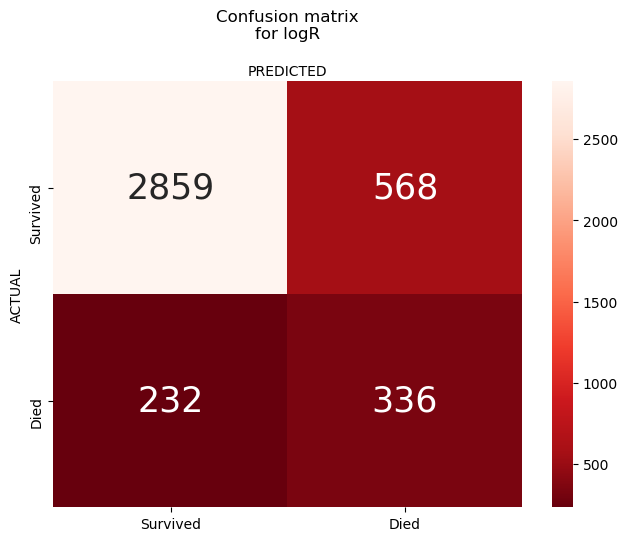

In [56]:
#Model
logR = LogisticRegression(max_iter=10000)
logR_fit = logR.fit(X_train[logR_stat_choose], y_train)

#Display results
plot_all(X_test=X_test[logR_stat_choose], 
         y_test=y_test, 
         model_name='logR', 
         model_fit=logR_fit, 
         feature_name='All',
         samp=samp)

In [16]:
#Calculate log odds
log_odds = pd.DataFrame([X_train[logR_stat_choose].columns.T, np.exp(logR_fit.coef_).T]).T
log_odds.columns = ['Variable', 'Log Odds']
log_odds.sort_values('Log Odds', ascending=False).head(30)

,Variable,Log Odds
0,BUNmedian,[32.19934495884811]
7,GCSComa1,[23.856699546403327]
8,Agemean,[13.279581294108908]
4,Lactatemedian,[13.0145780931269]
14,Glucosemedian,[8.627300898514182]
9,ALPmedian,[4.676693511475431]
3,pHmedian,[2.8702858876204154]
19,MechVentmax1,[2.842024010888815]
2,FiO2median,[2.7809851266551817]
6,HRmedian,[2.67843801114611]


In [17]:
logR_stat_impt

,variable,LogR coefficient,LogR t-value,LogR p-value,LogR Deviance,Wald p-value,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,Balanced accuracy,logR_Z,logR_Z_abs
5,ALTmedian,2.05,2.19,0.03,3464.10,0.03,85.8,0.0,0.0,0.0,51.59,17.07,-0.01,NaN,2.19,2.19
6,RenalInjury1,0.32,2.28,0.02,2598.26,0.00,85.8,0.0,0.0,0.0,53.93,16.10,0.00,NaN,2.28,2.28
7,ICUTypemax2,2.84,18.07,0.00,2428.38,0.00,85.8,0.0,0.0,0.0,57.91,16.47,0.00,NaN,18.07,18.07
8,Tachycardia1,1.05,18.07,0.00,2605.73,0.00,85.8,0.0,0.0,0.0,54.99,15.59,0.00,NaN,18.07,18.07
9,Agemean,1.55,22.77,0.00,2850.76,0.00,85.8,0.0,0.0,0.0,61.51,20.38,0.00,NaN,22.77,22.77
10,newHeightfirst,2.43,25.16,0.00,2680.05,0.00,85.8,0.0,0.0,0.0,52.05,15.40,0.00,NaN,25.16,25.16
11,newWeightfirst,2.76,25.25,0.00,2634.75,0.00,85.8,0.0,0.0,0.0,57.09,18.81,0.00,NaN,25.25,25.25
12,Urinemean48h,59.33,13.35,0.00,NaN,0.00,85.8,0.0,0.0,0.0,67.45,24.38,0.00,NaN,13.35,13.35
13,MeanDiasABPfirst,3.43,25.02,0.00,2691.37,0.00,85.8,0.0,0.0,0.0,47.07,14.02,0.00,NaN,25.02,25.02
14,MeanSysABPfirst,2.85,24.84,0.00,2710.75,0.00,85.8,0.0,0.0,0.0,47.11,13.71,0.00,NaN,24.84,24.84


In [18]:
#Obtain variable importance via absolute coefficient

try:
    logR_impt = logR_stat_impt
except:
    logR_impt = pd.DataFrame(logR_fit_stat.tvalues).reset_index().rename(columns={'index': 'variable', 0: 'logR_Z'}) #logR_fit_N.params
    
logR_impt['logR_Z_abs'] = abs(logR_impt['logR_Z'])

#Sort values
logR_impt = logR_impt.sort_values('logR_Z_abs', ascending=False)

#Display values
logR_impt

,variable,LogR coefficient,LogR t-value,LogR p-value,LogR Deviance,Wald p-value,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,Balanced accuracy,logR_Z,logR_Z_abs
29,Albuminmedian,2.92,26.61,0.00,2578.31,0.00,85.6,31.2,0.9,1.7,55.97,18.77,0.03,NaN,26.61,26.61
35,HCO3median,3.29,26.60,0.00,2560.46,0.00,85.7,33.3,0.4,0.7,63.69,25.14,0.02,NaN,26.60,26.60
46,SaO2median,1.33,26.22,0.00,2638.15,0.00,85.8,100.0,0.2,0.4,53.78,17.05,0.04,NaN,26.22,26.22
42,PaCO2median,4.24,26.10,0.00,2607.49,0.00,85.8,0.0,0.0,0.0,59.69,22.10,0.00,NaN,26.10,26.10
31,Cholesterolmedian,3.03,26.06,0.00,2645.11,0.00,85.8,0.0,0.0,0.0,49.31,14.26,0.00,NaN,26.06,26.06
26,pHmedian,2.33,25.89,0.00,2648.21,0.00,85.8,0.0,0.0,0.0,52.35,19.47,0.00,NaN,25.89,25.89
20,PaO2FiO2median,5.11,25.81,0.00,2658.14,0.00,85.8,0.0,0.0,0.0,49.49,14.05,0.00,NaN,25.81,25.81
27,newTempmedian,2.52,25.60,0.00,2627.50,0.00,85.8,0.0,0.0,0.0,55.50,19.57,0.00,NaN,25.60,25.60
45,RespRatemedian,2.92,25.59,0.00,2677.10,0.00,85.8,0.0,0.0,0.0,51.76,15.17,0.00,NaN,25.59,25.59
41,Namedian,2.50,25.52,0.00,2681.83,0.00,85.8,0.0,0.0,0.0,55.93,19.94,0.00,NaN,25.52,25.52


## 3.3 Decision Tree Classifier

In [19]:
#Plot variable importance
def plot_impt(X_train, model_impt, model_name):   
    
    #Display top 10 important variables
    display(model_impt.head(10))
    
    #Set display style
    sns.set(font_scale=1.3)
#     sns.axes_style()
    sns.set_style('ticks')
    plt.figure(figsize=(5,5))
    
    
    #Plot top 10 important variables
    model_impt.nlargest(10, model_name+'_impt').plot(kind='barh', x='variable', y=model_name+'_impt')
    plt.title('Feature Importance\nfor ' + model_name + '\n', y=1.1)
    plt.xlabel('Feature Importance')
    plt.ylabel('Variable')

    #Calculate cumulative importance
    model_impt['cumulative_impt'] = np.cumsum(model_impt[model_name+'_impt'])
    model_impt['cumulative_impt'] = [round((x-min(model_impt['cumulative_impt']))/(max(model_impt['cumulative_impt']) - min(model_impt['cumulative_impt'])), 2) for x in model_impt['cumulative_impt']]
    
    #Set display style
    plt.figure(figsize=(20,5))
    plt.plot(model_impt['variable'], model_impt['cumulative_impt'])
    plt.xticks(rotation='vertical')
    plt.xlabel('Variable')
    
    #Draw line at 90% of importance retained
    plt.hlines(y=0.90, xmin=0, xmax=len(model_impt['variable']), color='r', linestyles='dashed')

    #Check if sum of importance equal to 100%
    if(sum(model_impt[model_name+'_impt']) == 1):
        plt.title('Cumulative Importance\nfor ' + model_name, y=1.1)
        plt.ylabel('Cumulative Importance')
    else:
        plt.title('Scaled Cumulative Importance\nfor ' + model_name)
        plt.ylabel('Scaled Cumulative Importance')     
    
    #Show plot
    plt.show()
    plt.style.use('default')

### 3.2.1 Decision Tree (No feature selection)

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,All,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",72.8,26.6,51.8,35.1,64.05,20.63,0.22,2616,811,274,294


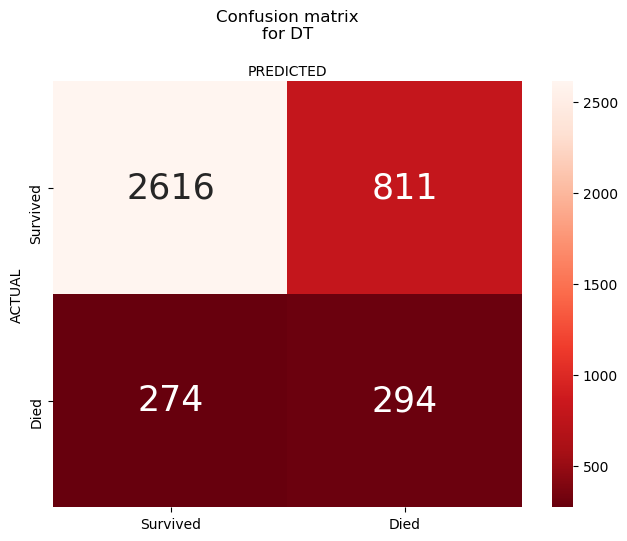

,variable,DT_impt,DT_cumulative_impt
36,GCSComa1,0.124801,0.124801
31,Urinemean48h,0.105475,0.230275
4,BUNmedian,0.065417,0.295693
17,PaCO2median,0.053974,0.349667
7,Creatininemedian,0.042389,0.392056
13,Kmedian,0.039833,0.431889
11,HCTmedian,0.034998,0.466888
33,MeanSysABPfirst,0.034584,0.501472
9,Glucosemedian,0.032181,0.533653
28,Agemean,0.030567,0.564220


<Figure size 500x500 with 0 Axes>

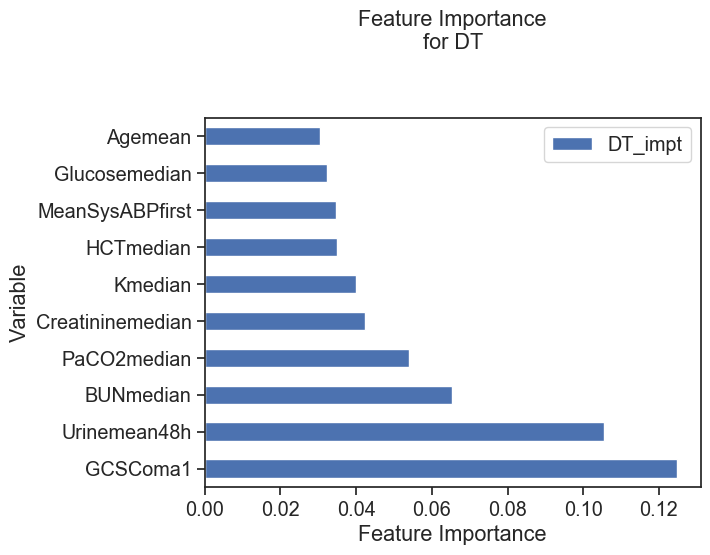

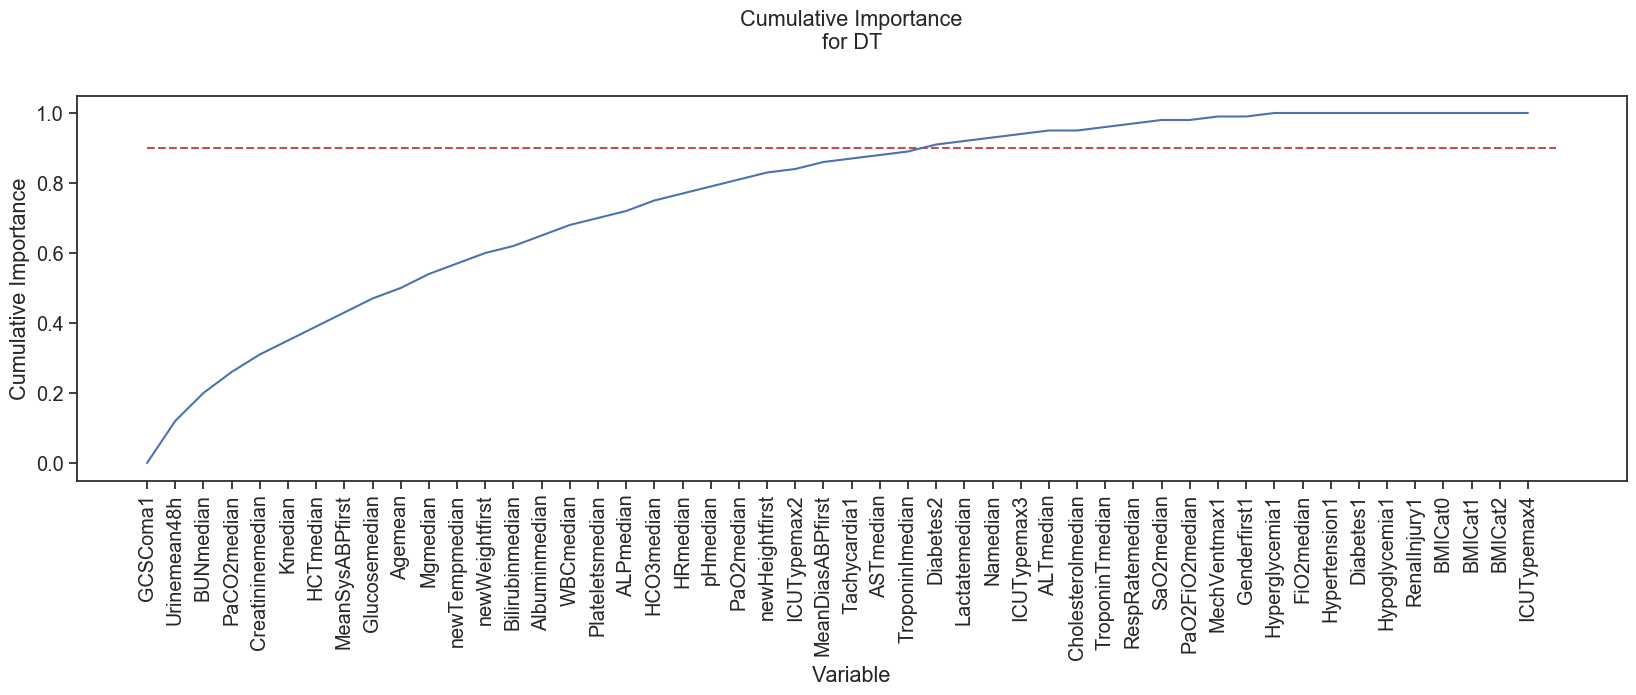

,index,variable,DT_impt,DT_cumulative_impt,cumulative_impt
0,36,GCSComa1,0.124801,0.124801,0.00
1,31,Urinemean48h,0.105475,0.230275,0.12
2,4,BUNmedian,0.065417,0.295693,0.20
3,17,PaCO2median,0.053974,0.349667,0.26
4,7,Creatininemedian,0.042389,0.392056,0.31
5,13,Kmedian,0.039833,0.431889,0.35
6,11,HCTmedian,0.034998,0.466888,0.39
7,33,MeanSysABPfirst,0.034584,0.501472,0.43
8,9,Glucosemedian,0.032181,0.533653,0.47
9,28,Agemean,0.030567,0.564220,0.50


In [20]:
#Import library
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#Model
DT = DecisionTreeClassifier(criterion='gini', random_state=500)
DT_fit = DT.fit(X_train, y_train)

#Display cumulative importance
DT_impt = pd.DataFrame({'variable': X_train.columns, 'DT_impt': DT.feature_importances_}).sort_values('DT_impt', ascending=False)
DT_impt['DT_cumulative_impt'] =  np.cumsum(DT_impt['DT_impt'])

#Display results
plot_all(X_test=X_test, 
         y_test=y_test, 
         model_name='DT', 
         model_fit=DT_fit, 
         feature_name='All',
         samp=samp)
plot_impt(X_train, DT_impt, 'DT')

#Display top 40 variables
display(DT_impt.reset_index().head(40))

### 3.2.2 Decision Tree (Feature selection from univariate analysis)

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,All,DT_LR,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",72.0,27.5,59.0,37.5,66.58,22.03,0.25,2542,885,233,335


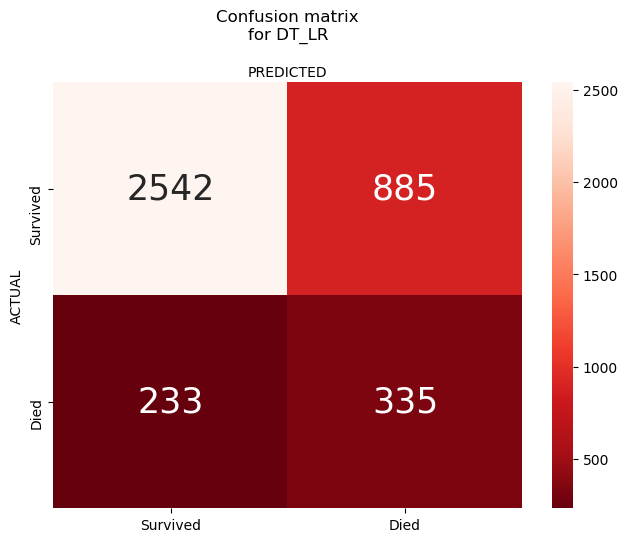

,variable,DT_LR_impt,DT_LR_cumulative_impt
0,BUNmedian,0.135109,0.135109
7,GCSComa1,0.124801,0.259909
8,Agemean,0.079979,0.339888
13,newTempmedian,0.067346,0.407235
1,HCO3median,0.066774,0.474009
14,Glucosemedian,0.059227,0.533237
17,newWeightfirst,0.059218,0.592454
4,Lactatemedian,0.055045,0.647499
11,Albuminmedian,0.051031,0.698531
6,HRmedian,0.044250,0.742781


<Figure size 500x500 with 0 Axes>

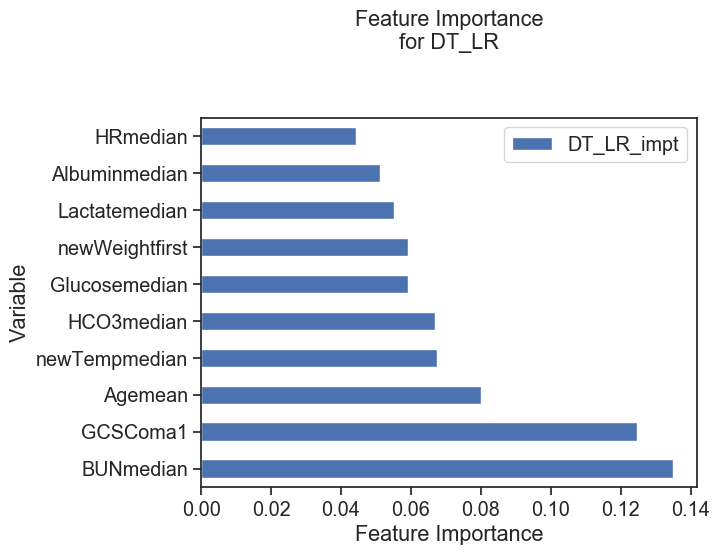

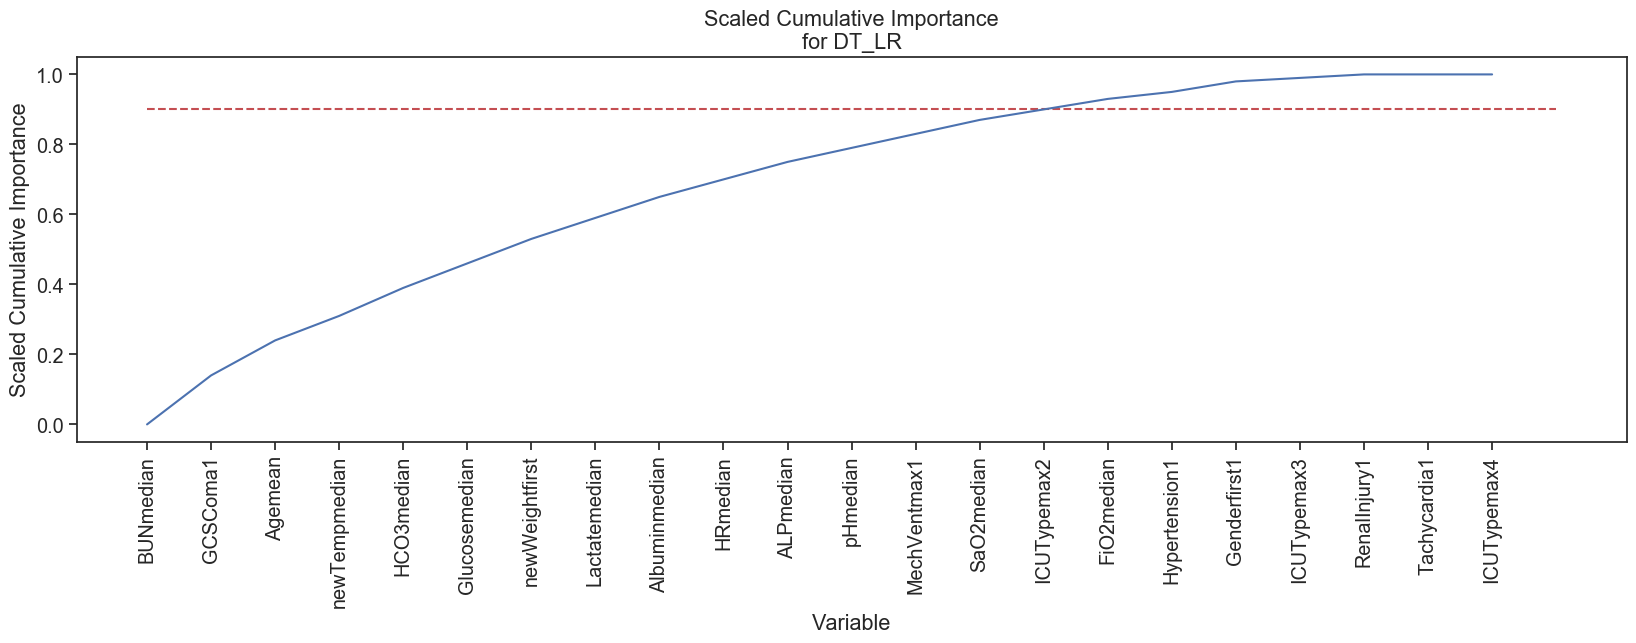

,index,variable,DT_LR_impt,DT_LR_cumulative_impt,cumulative_impt
0,0,BUNmedian,0.135109,0.135109,0.00
1,7,GCSComa1,0.124801,0.259909,0.14
2,8,Agemean,0.079979,0.339888,0.24
3,13,newTempmedian,0.067346,0.407235,0.31
4,1,HCO3median,0.066774,0.474009,0.39
5,14,Glucosemedian,0.059227,0.533237,0.46
6,17,newWeightfirst,0.059218,0.592454,0.53
7,4,Lactatemedian,0.055045,0.647499,0.59
8,11,Albuminmedian,0.051031,0.698531,0.65
9,6,HRmedian,0.044250,0.742781,0.70


In [21]:
#Import library
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#Model
DT_LR = DecisionTreeClassifier(criterion='gini', random_state=500)
DT_LR_fit = DT_LR.fit(X_train[logR_stat_choose], y_train)

#Display cumulative importance
DT_LR_impt = pd.DataFrame({'variable': X_train[logR_stat_choose].columns, 'DT_LR_impt': DT_LR.feature_importances_}).sort_values('DT_LR_impt', ascending=False)
DT_LR_impt['DT_LR_cumulative_impt'] =  np.cumsum(DT_LR_impt['DT_LR_impt'])

#Display results
plot_all(X_test=X_test[logR_stat_choose], 
         y_test=y_test, 
         model_name='DT_LR', 
         model_fit=DT_LR_fit, 
         feature_name='All',
         samp=samp)

plot_impt(X_train[logR_stat_choose], DT_LR_impt, 'DT_LR')

#Display top 40 variables
display(DT_LR_impt.reset_index().head(40))

### 3.3 Plot decision tree

In [ ]:
#Import library
from sklearn.tree import export_graphviz, plot_tree
from sklearn import tree
from sklearn.datasets import *
from dtreeviz.trees import *

# #Set path
# # import os
# # os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Lib/site-packages/graphviz' #Update to the installation path

#Plot Decision Tree
export_graphviz(DT, out_file=None, feature_names=X_train.columns)
plot_tree(DT_fit, max_depth=5)

classifier = tree.DecisionTreeClassifier(max_depth=3)  # limit depth of tree
classifier.fit(X_train, y_train)

viz = dtreeviz(DT,
               X_train,
               y_train,
               target_name='In-hospital death',
               feature_names=X_train.columns,
               class_names=['Survived', 'Died'],
#                fancy=False,
#                orientation ='LR',
              )
              
viz.view()      

# 4 Feature importance

## 4.1 Union

In [23]:
#Create dataframe
impt_union = pd.DataFrame({'variable': X_train.columns.T})

#Merge dataframe
impt_union = impt_union.merge(logR_impt, on = 'variable', how='outer')

#Merge dataframes
impt_union = impt_union.merge(DT_impt.head(30), on = 'variable', how='outer')
try:
    impt_union = impt_union.merge(DT_LR_impt.head(30), on = 'variable', how='outer')
except:
    None

#Remove rows with NA
impt_union = impt_union.dropna(thresh=2, axis=0)

#Rows with NA will be ranked at the bottom
impt_union['logR_impt_rank'] = impt_union['logR_Z_abs'].rank(ascending=False, na_option='bottom').astype(int)
impt_union['DT_impt_rank'] = impt_union['DT_impt'].rank(ascending=False, na_option='bottom').astype(int)

try:
    impt_union['DT_LR_impt_rank'] = impt_union['DT_LR_impt'].rank(ascending=False, na_option='bottom').astype(int)
except:
    None
    
#Calculate average rank
impt_union['all'] = impt_union.filter(regex=("rank")).mean(axis=1)#.astype(int)

#Sort values
impt_union = impt_union.sort_values('all', ascending=True)

#Save file
impt_union.to_excel('impt/impt_union_' + samp + '.xlsx')

#Display variable importance
display(impt_union)

,variable,LogR coefficient,LogR t-value,LogR p-value,LogR Deviance,Wald p-value,Accuracy,Precision,Recall,F1,...,DT_impt,DT_cumulative_impt,cumulative_impt_x,DT_LR_impt,DT_LR_cumulative_impt,cumulative_impt_y,logR_impt_rank,DT_impt_rank,DT_LR_impt_rank,all
26,newTempmedian,2.52,25.60,0.00,2627.50,0.00,85.8,0.0,0.0,0.0,...,0.028497,0.622323,0.57,0.067346,0.407235,0.31,8,12,4,8.000000
3,Albuminmedian,2.92,26.61,0.00,2578.31,0.00,85.6,31.2,0.9,1.7,...,0.022980,0.694232,0.65,0.051031,0.698531,0.65,1,15,9,8.333333
10,HCO3median,3.29,26.60,0.00,2560.46,0.00,85.7,33.3,0.4,0.7,...,0.019942,0.777896,0.75,0.066774,0.474009,0.39,2,19,5,8.666667
30,newWeightfirst,2.76,25.25,0.00,2634.75,0.00,85.8,0.0,0.0,0.0,...,0.024891,0.647215,0.60,0.059218,0.592454,0.53,11,13,7,10.333333
28,Agemean,1.55,22.77,0.00,2850.76,0.00,85.8,0.0,0.0,0.0,...,0.030567,0.564220,0.50,0.079979,0.339888,0.24,20,10,3,11.000000
25,pHmedian,2.33,25.89,0.00,2648.21,0.00,85.8,0.0,0.0,0.0,...,0.017941,0.813986,0.79,0.036819,0.821670,0.79,6,21,12,13.000000
9,Glucosemedian,5.23,21.17,0.00,2923.93,0.00,85.4,16.7,0.7,1.4,...,0.032181,0.533653,0.47,0.059227,0.533237,0.46,25,9,6,13.333333
4,BUNmedian,3.22,11.85,0.00,3306.01,0.00,84.7,36.0,9.5,15.0,...,0.065417,0.295693,0.20,0.135109,0.135109,0.00,37,3,1,13.666667
17,PaCO2median,4.24,26.10,0.00,2607.49,0.00,85.8,0.0,0.0,0.0,...,0.053974,0.349667,0.26,NaN,NaN,NaN,4,4,35,14.333333
36,GCSComa1,-1.84,-7.05,0.00,2395.04,0.00,85.6,48.3,22.2,30.4,...,0.124801,0.124801,0.00,0.124801,0.259909,0.14,41,1,2,14.666667


## 4.2 Intersection

In [24]:
#Create dataframe
impt_intersection = pd.DataFrame({'variable': X_train.columns.T})

#Merge dataframe
impt_intersection = impt_intersection.merge(logR_impt, on = 'variable', how='inner')

#Merge dataframes
impt_intersection = impt_intersection.merge(DT_impt, on = 'variable', how='inner')
try:
    impt_intersection = impt_intersection.merge(DT_LR_impt.head(30), on = 'variable', how='inner')
except:
    None

#Obtain rank
impt_intersection['logR_impt_rank'] = impt_intersection['logR_Z_abs'].rank(method='first', ascending=False).astype(int)
impt_intersection['DT_impt_rank'] = impt_intersection['DT_impt'].rank(method='first', ascending=False).astype(int)
try:
    impt_intersection['DT_LR_impt_rank'] = impt_intersection['DT_LR_impt'].rank(method='first', ascending=False).astype(int)
except:
    None
impt_intersection['all'] = impt_intersection.filter(regex=("rank")).mean(axis=1)#.astype(int)
impt_intersection = impt_intersection.sort_values('all', ascending=True)

#Rows with NA will be ranked at the bottom
impt_intersection['logR_impt_rank'] = impt_intersection['logR_Z_abs'].rank(ascending=False, na_option='bottom').astype(int)
impt_intersection['DT_impt_rank'] = impt_intersection['DT_impt'].rank(ascending=False, na_option='bottom').astype(int)

try:
    impt_intersection['DT_LR_impt_rank'] = impt_intersection['DT_LR_impt'].rank(ascending=False, na_option='bottom').astype(int)
except:
    None
    
#Calculate average rank
impt_intersection['all'] = impt_intersection.filter(regex=("rank")).mean(axis=1)#.astype(int)

#Sort values
impt_intersection = impt_intersection.sort_values('all', ascending=True)

#Save file
impt_intersection.to_excel('impt/impt_intersection_' + samp + '.xlsx')

#Display variable importance
display(impt_intersection)

,variable,LogR coefficient,LogR t-value,LogR p-value,LogR Deviance,Wald p-value,Accuracy,Precision,Recall,F1,...,DT_impt,DT_cumulative_impt,cumulative_impt_x,DT_LR_impt,DT_LR_cumulative_impt,cumulative_impt_y,logR_impt_rank,DT_impt_rank,DT_LR_impt_rank,all
10,newTempmedian,2.52,25.60,0.00,2627.50,0.0,85.8,0.0,0.0,0.0,...,0.028497,0.622323,0.57,0.067346,0.407235,0.31,5,5,4,4.666667
11,Agemean,1.55,22.77,0.00,2850.76,0.0,85.8,0.0,0.0,0.0,...,0.030567,0.564220,0.50,0.079979,0.339888,0.24,8,4,3,5.000000
5,HCO3median,3.29,26.60,0.00,2560.46,0.0,85.7,33.3,0.4,0.7,...,0.019942,0.777896,0.75,0.066774,0.474009,0.39,2,9,5,5.333333
1,Albuminmedian,2.92,26.61,0.00,2578.31,0.0,85.6,31.2,0.9,1.7,...,0.022980,0.694232,0.65,0.051031,0.698531,0.65,1,7,9,5.666667
12,newWeightfirst,2.76,25.25,0.00,2634.75,0.0,85.8,0.0,0.0,0.0,...,0.024891,0.647215,0.60,0.059218,0.592454,0.53,6,6,7,6.333333
2,BUNmedian,3.22,11.85,0.00,3306.01,0.0,84.7,36.0,9.5,15.0,...,0.065417,0.295693,0.20,0.135109,0.135109,0.00,17,2,1,6.666667
4,Glucosemedian,5.23,21.17,0.00,2923.93,0.0,85.4,16.7,0.7,1.4,...,0.032181,0.533653,0.47,0.059227,0.533237,0.46,11,3,6,6.666667
15,GCSComa1,-1.84,-7.05,0.00,2395.04,0.0,85.6,48.3,22.2,30.4,...,0.124801,0.124801,0.00,0.124801,0.259909,0.14,21,1,2,8.000000
6,HRmedian,2.45,23.62,0.00,2788.07,0.0,85.8,0.0,0.0,0.0,...,0.018150,0.796046,0.77,0.044250,0.742781,0.70,7,10,10,9.000000
9,pHmedian,2.33,25.89,0.00,2648.21,0.0,85.8,0.0,0.0,0.0,...,0.017941,0.813986,0.79,0.036819,0.821670,0.79,4,11,12,9.000000


# 5 Modelling

## 5.1 Select features

In [25]:
#Retrieve variables
logR_choose = logR_stat_impt['variable']
DT_choose = DT_impt['variable']
ld_union_choose = impt_union['variable']
ld_intersection_choose = impt_intersection['variable']

try:
    DT_LR_choose = DT_LR_impt['variable']
except:
    None

In [26]:
#Read CPH and RSF variables
# df_cph_rsf = pd.read_excel('CPH_RSF.xlsx', sheet_name='All')
# pd.merge(df_cph_rsf[['variable', 'cph_impt_rank']], df_cph_rsf[['variable', 'rsf_impt_rank']])

In [27]:
#Specify CPH features
cph_choose = [
'BUNmedian',
'Bilirubinmedian',
'FiO2median',
'HRmedian',
'Lactatemedian',
'TroponinImedian',
'WBCmedian',
'newTempmedian',
'newWeightfirst',
'Agemean',
'GCSComa1',
'Diabetes1',
'ICUTypemax2',
'ICUTypemax3',
'ICUTypemax4',
'Diabetes2'
]

In [28]:
#Find intersection between LD and CPH variables
ld_union_cph = pd.merge(pd.DataFrame({'ld_union': ld_union_choose}), pd.DataFrame({'CPH': cph_choose}), left_on='ld_union', right_on='CPH', indicator='Source', how='outer')
ld_union_cph_choose = ld_union_cph[ld_union_cph['Source'] == 'both']['ld_union']

ld_intersection_cph = pd.merge(pd.DataFrame({'ld_intersection': ld_intersection_choose}), pd.DataFrame({'CPH': cph_choose}), left_on='ld_intersection', right_on='CPH', indicator='Source', how='outer')
ld_intersection_cph_choose = ld_intersection_cph[ld_intersection_cph['Source'] == 'both']['ld_intersection']

## 5.2 Generate models

In [29]:
#Import library
import numpy as np
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import AdaBoostClassifier

#New classifier
class AdaCostClassifier(AdaBoostClassifier):
    def _boost_real(self, iboost, X, y, sample_weight, random_state):
        """Implement a single boost using the SAMME.R real algorithm."""
        estimator = self._make_estimator(random_state=random_state)
        estimator.fit(X, y, sample_weight=sample_weight)

        y_predict_proba = estimator.predict_proba(X)

        if iboost == 0:
            self.classes_ = getattr(estimator, 'classes_', None)
            self.n_classes_ = len(self.classes_)

        y_predict = self.classes_.take(np.argmax(y_predict_proba, axis=1),
                                       axis=0)

        incorrect = y_predict != y

        estimator_error = np.mean(
            np.average(incorrect, weights=sample_weight, axis=0))

        if estimator_error <= 0:
            return sample_weight, 1., 0.

        n_classes = self.n_classes_
        classes = self.classes_
        y_codes = np.array([-1. / (n_classes - 1), 1.])
        y_coding = y_codes.take(classes == y[:, np.newaxis])

        proba = y_predict_proba  # alias for readability
        proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps

        estimator_weight = (-1. * self.learning_rate
                                * (((n_classes - 1.) / n_classes) *
                                   inner1d(y_coding, np.log(y_predict_proba))))

        # weight change function
        if not iboost == self.n_estimators - 1:
            sample_weight *= np.exp(estimator_weight *
                                    ((sample_weight > 0) |
                                     (estimator_weight < 0)) *
                                    self._beta(y, y_predict))  #Based on former result, *self._beta(y, y_predict), cost
        return sample_weight, 1., estimator_error


    #Cost adaptive function
    def _beta(self, y, y_hat,p_cost = 1.05,r_cost = 1.25):
        res = []
        for i in zip(y, y_hat):
            if i[0] == i[1]:
                res.append(1)  
            elif i[0] == 0 and i[1] == 1: #False Positive: Predicted to die but survived
                res.append(p_cost)  
            elif i[0] == 1 and i[1] == 0: #False Negative: Predicted to survive but died
                res.append(r_cost)  
            else:
                print(i[0], i[1])

        return np.array(res)

# AdaCost model
ac_clf = AdaCostClassifier(DecisionTreeClassifier(max_depth = 3),n_estimators=250, random_state=8, learning_rate=0.02)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
#Import library
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LassoCV, LogisticRegression, SGDClassifier, RidgeClassifier, LogisticRegressionCV, RidgeClassifierCV, PassiveAggressiveClassifier, Perceptron
from sklearn.pipeline import Pipeline
import xgboost as XGB
from sklearn.naive_bayes import GaussianNB

#Pipeline to try different classifiers and see metrics
def pipe(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, feature='All', samp=samp, test_unseen='test'):
    classifiers = [
        ('logR', LogisticRegression(max_iter=10000, C=10, penalty='l2', solver='lbfgs')),  
#         ('logRCV', LogisticRegressionCV(cv=5, max_iter=10000, n_jobs=-1)),  
#         ('PassiveAggressive', PassiveAggressiveClassifier()),     
#         ('Ridge', RidgeClassifier()), 
#         ('RidgeCV', RidgeClassifierCV(cv=5)),
#         ('SGD', SGDClassifier()), 
#         ('Perceptron', Perceptron()),

#         ('KNeighbors', KNeighborsClassifier(2)),

        ('SVCrbf', SVC(kernel="rbf", C=0.025, probability=True)),
#         ('SVCgamma', SVC(C=100, gamma='scale')), 

#         ('GaussianNB', GaussianNB()),
        
        ('DT', DecisionTreeClassifier(criterion='gini', random_state=500)),
        ('RF', RandomForestClassifier(n_estimators=200, criterion='gini', n_jobs=-1)),
        ('AdaB', AdaBoostClassifier()),
        ('AdaC', AdaCostClassifier(DecisionTreeClassifier(max_depth = 3), n_estimators=250, random_state=8, learning_rate=0.02)),
        ('GB', GradientBoostingClassifier()),

        ('XT', ExtraTreesClassifier(criterion='gini', n_jobs=-1)),
        ('XGB', XGB.XGBClassifier(max_depth=10, n_estimators=1000,  learning_rate=0.01, random_state=500, scale_pos_weight=1, subsample=0.5, colsample_bytree=0.5, n_jobs=-1))
         ]

    #Create dataframe
    df_classifier = pd.DataFrame(columns=['Dataset', 'Sampling', 'Feature', 'Model Name', 'Model Parameters', 
                                          'Accuracy', 'Precision', 'Recall', 
                                          'F1', 'AUCROC', 'Average Precision Score', 'Matthews Correlation Coefficient',
                                          'True Negatives', 'False Positives', 'False Negatives', 'True Positives'])

    #Iterate through models
    for classifier in classifiers:
        #Obtain model name
        model_name = classifier[0]
        model = classifier[1] #Pipeline(steps=[('classifier', classifier)])
        
        #Convert categorical data to int for XGB
        if(model_name=='XGB'):
            X_train[X_train.select_dtypes('category').columns] = X_train.select_dtypes('category').astype('int')
            X_test[X_test.select_dtypes('category').columns] = X_test.select_dtypes('category').astype('int')
        
        #Model
        model_fit = model.fit(X_train, y_train)
        
        #Obtain predicted possibilities
        y_pred = pd.DataFrame(model_fit.predict(X_test), columns=['Predicted'])
        y_pred['Y'] = [1 if x >= 0.5 else 0 for x in y_pred['Predicted']]

        #Obtain predicted possibilities, else decision function (if available)
        try:
                y_score = model_fit.predict_proba(X_test)[:,1]
        except:
                try:
                    y_score = model_fit.decision_function(X_test)[:,1]
                except:
                    y_score = np.nan
        
        #Obtain average precision (if available)
        try:
            average_precision = round(average_precision_score(y_test, y_score) * 100, 2)
        except:
            average_precision = np.nan
        
        #Obtain balanced accuracy (if available)
        try:
            balanced_accuracy = balanced_accuracy_score(y_test, y_score)
        except:
            balanced_accuracy = np.nan
        
        #Obtain AUC ROC (if available)
        try:
            aucroc = round(roc_auc_score(y_test, y_score) * 100, 2)
        except:
            aucroc = np.nan

                
        #Obtain confusion matrix
        TN, FP, FN, TP = confusion_matrix(y_test, model_fit.predict(X_test), labels=[0, 1]).ravel()
        TN = TN.astype(float)
        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)


        #Append values
        df_classifier = df_classifier.append({
                                              'Dataset': test_unseen,
                                              'Sampling': samp.title(),
                                              'Feature': feature,
                                              'Model Name': model_name, 
                                              'Model Parameters': model, 
                                              'Accuracy': round(accuracy_score(y_test, y_pred['Y']) * 100, 1),
                                              'Precision': round(precision_score(y_test, y_pred['Y']) * 100, 1),
                                              'Recall': round(recall_score(y_test, y_pred['Y']) * 100, 1),
                                              'F1': round(f1_score(y_test, y_pred['Y']) * 100, 1),
                                              'AUCROC': aucroc,
#                                               'Balanced accuracy': balanced_accuracy,
                                              'Average Precision Score': average_precision,
                                              'Matthews Correlation Coefficient': round(matthews_corrcoef(y_test, y_pred['Y']), 2),
                                              'True Negatives': TN, 
                                              'False Positives': FP, 
                                              'False Negatives': FN, 
                                              'True Positives': TP,
                                             },
                                             ignore_index=True)
        
        
    #Display classifiers
#         display(df_classifier)
#         classification_report(X_test, y_test)

#         print(classification_report(y_test, y_pred))
#         print(accuracy_score(y_test, y_pred)*100)
#         print(precision_score(y_test, y_pred)*100)
#         print(recall_score(y_test, y_pred)*100)

#         print(classifier)
#         print("model score: %.3f" % pipe.score(X_test, y_test))
#         display(plot_all(X_test, y_test, pipe_fit))
#         print('\n')
    
    #Sort values
    df_classifier = df_classifier.sort_values('Recall', ascending=False)
    
    #Calculate mean and median
    df_classifier.loc['Mean'] = df_classifier.mean(axis=0)
    df_classifier.loc['Median'] = df_classifier.median(axis=0)
    
    #Display results
    display(df_classifier)
    return(df_classifier)

In [31]:
#Find best models and features
def pipe_test_unseen(test_unseen):
    
    if (test_unseen == 'test'):
        X_test_unseen = X_test
        y_test_unseen = y_test
        
    elif (test_unseen == 'unseen'):
        X_test_unseen = X_unseen
        y_test_unseen = y_unseen
    
    #Try all features
    all_features = pipe(X_train, X_test_unseen, y_train, y_test_unseen, samp=samp, test_unseen=test_unseen)
    logR_features = pipe(X_train[logR_choose], X_test_unseen[logR_choose], y_train, y_test_unseen, feature='LogR', samp=samp, test_unseen=test_unseen)
    DT_features = pipe(X_train[DT_choose], X_test_unseen[DT_choose], y_train, y_test_unseen, feature='DT', samp=samp, test_unseen=test_unseen)
    try:
        DT_LR_features = pipe(X_train[DT_LR_choose], X_test_unseen[DT_LR_choose], y_train, y_test_unseen, feature='DT_LR', samp=samp, test_unseen=test_unseen)
    except:
        None
    ld_union_features = pipe(X_train[ld_union_choose], X_test_unseen[ld_union_choose], y_train, y_test_unseen, feature='LD Union', samp=samp, test_unseen=test_unseen)
    ld_intersection_features = pipe(X_train[ld_intersection_choose], X_test_unseen[ld_intersection_choose], y_train, y_test_unseen, feature='LD Intersection', samp=samp, test_unseen=test_unseen)
    cph_features = pipe(X_train[cph_choose], X_test_unseen[cph_choose], y_train, y_test_unseen, feature='CPH', samp=samp, test_unseen=test_unseen)
    cph_union_features = pipe(X_train[ld_union_cph_choose], X_test_unseen[ld_union_cph_choose], y_train, y_test_unseen, feature='CPH Union', samp=samp, test_unseen=test_unseen)
    cph_intersection_features = pipe(X_train[ld_intersection_cph_choose], X_test_unseen[ld_intersection_cph_choose], y_train, y_test_unseen, feature='CPH Intersection', samp=samp, test_unseen=test_unseen)

    #Save file
    with pd.ExcelWriter('model/model_comparison_' + samp + '_' + test_unseen + '.xlsx') as writer: 
        try:
            pd.concat([all_features, logR_features, DT_features, DT_LR_features, ld_union_features, ld_intersection_features, cph_features, cph_union_features, cph_intersection_features], axis=0).to_excel(writer, sheet_name=samp)
        except:
            pd.concat([all_features, logR_features, DT_features, ld_union_features, ld_intersection_features, cph_features, cph_union_features, cph_intersection_features], axis=0).to_excel(writer, sheet_name=samp)

In [32]:
#Find best models and features
pipe_test_unseen('test')
pipe_test_unseen('unseen')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,test,Undersampling,All,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",76.900000,34.900000,72.400000,47.100000,82.970000,46.000000,0.380000,2662.000000,765.000000,157.000000,411.000000
4,test,Undersampling,All,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",78.100000,35.000000,63.000000,45.000000,80.960000,43.130000,0.350000,2762.000000,665.000000,210.000000,358.000000
0,test,Undersampling,All,logR,"LogisticRegression(C=10, class_weight=None, du...",80.900000,38.900000,59.900000,47.100000,82.200000,44.380000,0.370000,2892.000000,535.000000,228.000000,340.000000
8,test,Undersampling,All,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",83.800000,44.400000,55.500000,49.300000,83.370000,46.670000,0.400000,3032.000000,395.000000,253.000000,315.000000
3,test,Undersampling,All,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.100000,42.500000,53.700000,47.500000,82.780000,44.260000,0.380000,3015.000000,412.000000,263.000000,305.000000
2,test,Undersampling,All,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",72.800000,26.600000,51.800000,35.100000,64.050000,20.630000,0.220000,2616.000000,811.000000,274.000000,294.000000
7,test,Undersampling,All,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",82.300000,40.300000,51.600000,45.300000,80.410000,40.400000,0.350000,2993.000000,434.000000,275.000000,293.000000
5,test,Undersampling,All,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.400000,42.900000,50.700000,46.500000,79.840000,42.250000,0.370000,3044.000000,383.000000,280.000000,288.000000
1,test,Undersampling,All,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.000000,0.000000,0.000000,78.610000,37.390000,0.000000,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.788889,33.944444,50.955556,40.322222,79.465556,40.567778,0.313333,2938.111111,488.888889,278.666667,289.333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,test,Undersampling,LogR,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",79.700000,38.000000,67.400000,48.600000,83.030000,46.070000,0.400000,2802.000000,625.000000,185.000000,383.000000
0,test,Undersampling,LogR,logR,"LogisticRegression(C=10, class_weight=None, du...",81.300000,39.200000,57.200000,46.500000,81.750000,44.380000,0.370000,2923.000000,504.000000,243.000000,325.000000
8,test,Undersampling,LogR,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",83.400000,43.400000,55.300000,48.600000,83.010000,46.670000,0.390000,3017.000000,410.000000,254.000000,314.000000
3,test,Undersampling,LogR,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.800000,44.400000,54.600000,49.000000,82.500000,45.000000,0.400000,3039.000000,388.000000,258.000000,310.000000
5,test,Undersampling,LogR,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.200000,42.500000,51.800000,46.700000,81.360000,42.870000,0.370000,3029.000000,398.000000,274.000000,294.000000
2,test,Undersampling,LogR,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",69.600000,23.500000,50.500000,32.100000,61.640000,18.910000,0.180000,2493.000000,934.000000,281.000000,287.000000
7,test,Undersampling,LogR,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",82.400000,40.500000,50.000000,44.700000,81.110000,42.970000,0.350000,3009.000000,418.000000,284.000000,284.000000
4,test,Undersampling,LogR,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.900000,41.500000,49.600000,45.200000,81.050000,43.480000,0.350000,3029.000000,398.000000,286.000000,282.000000
1,test,Undersampling,LogR,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.000000,0.000000,0.000000,79.670000,39.580000,0.000000,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,81.344444,34.777778,48.488889,40.155556,79.457778,41.103333,0.312222,2974.222222,452.777778,292.555556,275.444444


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,test,Undersampling,DT,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",76.900000,34.900000,72.400000,47.100000,83.020000,46.06,0.380000,2662.000000,765.000000,157.000000,411.000000
4,test,Undersampling,DT,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",78.100000,35.000000,63.000000,45.000000,80.960000,43.13,0.350000,2762.000000,665.000000,210.000000,358.000000
0,test,Undersampling,DT,logR,"LogisticRegression(C=10, class_weight=None, du...",80.900000,38.800000,59.700000,47.000000,82.210000,44.38,0.370000,2892.000000,535.000000,229.000000,339.000000
8,test,Undersampling,DT,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",83.500000,43.900000,57.400000,49.800000,83.670000,47.63,0.410000,3011.000000,416.000000,242.000000,326.000000
3,test,Undersampling,DT,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.000000,42.700000,56.700000,48.700000,82.750000,44.10,0.390000,2995.000000,432.000000,246.000000,322.000000
2,test,Undersampling,DT,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",69.200000,24.300000,55.100000,33.700000,63.340000,19.78,0.200000,2453.000000,974.000000,255.000000,313.000000
5,test,Undersampling,DT,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.400000,43.000000,51.100000,46.700000,79.980000,42.69,0.370000,3043.000000,384.000000,278.000000,290.000000
7,test,Undersampling,DT,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.300000,38.200000,50.900000,43.700000,79.950000,39.61,0.330000,2960.000000,467.000000,279.000000,289.000000
1,test,Undersampling,DT,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.000000,0.000000,0.000000,78.610000,37.39,0.000000,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.233333,33.422222,51.811111,40.188889,79.387778,40.53,0.311111,2911.666667,515.333333,273.777778,294.222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,test,Undersampling,DT_LR,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",76.400000,33.50,66.900000,44.700000,80.990000,42.620000,0.350000,2674.000000,753.000000,188.000000,380.000000
8,test,Undersampling,DT_LR,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",78.700000,36.30,66.200000,46.900000,82.010000,43.070000,0.370000,2768.000000,659.000000,192.000000,376.000000
6,test,Undersampling,DT_LR,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",79.600000,37.30,64.100000,47.200000,82.220000,43.660000,0.380000,2816.000000,611.000000,204.000000,364.000000
0,test,Undersampling,DT_LR,logR,"LogisticRegression(C=10, class_weight=None, du...",78.800000,36.00,62.500000,45.700000,81.620000,44.140000,0.360000,2795.000000,632.000000,213.000000,355.000000
5,test,Undersampling,DT_LR,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",79.900000,37.20,60.200000,46.000000,80.600000,41.950000,0.360000,2849.000000,578.000000,226.000000,342.000000
2,test,Undersampling,DT_LR,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",72.300000,27.80,59.500000,37.900000,66.960000,22.310000,0.260000,2550.000000,877.000000,230.000000,338.000000
3,test,Undersampling,DT_LR,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.600000,39.90,57.900000,47.300000,81.900000,41.390000,0.380000,2932.000000,495.000000,239.000000,329.000000
7,test,Undersampling,DT_LR,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",80.300000,37.30,56.500000,45.000000,80.260000,39.580000,0.350000,2888.000000,539.000000,247.000000,321.000000
1,test,Undersampling,DT_LR,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.00,0.000000,0.000000,79.320000,39.600000,0.000000,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,79.266667,31.70,54.866667,40.077778,79.542222,39.813333,0.312222,2855.444444,571.555556,256.333333,311.666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,test,Undersampling,LD Union,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",76.400000,34.400000,72.2,46.600000,82.67,45.500000,0.380000,2644.000000,783.000000,158.000000,410.000000
4,test,Undersampling,LD Union,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",77.200000,34.000000,64.4,44.600000,80.82,42.980000,0.340000,2718.000000,709.000000,202.000000,366.000000
0,test,Undersampling,LD Union,logR,"LogisticRegression(C=10, class_weight=None, du...",80.800000,38.500000,58.6,46.500000,82.21,44.500000,0.370000,2895.000000,532.000000,235.000000,333.000000
3,test,Undersampling,LD Union,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.100000,43.000000,56.9,48.900000,82.68,45.860000,0.400000,2998.000000,429.000000,245.000000,323.000000
8,test,Undersampling,LD Union,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",84.100000,45.300000,55.8,50.000000,83.50,47.050000,0.410000,3044.000000,383.000000,251.000000,317.000000
2,test,Undersampling,LD Union,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",70.000000,24.100000,51.8,32.900000,62.40,19.350000,0.190000,2503.000000,924.000000,274.000000,294.000000
7,test,Undersampling,LD Union,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",82.900000,41.600000,50.0,45.400000,80.92,41.950000,0.360000,3028.000000,399.000000,284.000000,284.000000
5,test,Undersampling,LD Union,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.600000,43.000000,47.5,45.200000,79.23,42.010000,0.360000,3069.000000,358.000000,298.000000,270.000000
1,test,Undersampling,LD Union,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.000000,0.0,0.000000,79.00,37.890000,0.000000,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.433333,33.766667,50.8,40.011111,79.27,40.787778,0.312222,2925.111111,501.888889,279.444444,288.555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,test,Undersampling,LD Intersection,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",76.400000,33.500000,66.900000,44.700000,80.990000,42.620000,0.35,2674.000000,753.000000,188.000000,380.000000
8,test,Undersampling,LD Intersection,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",78.800000,36.500000,66.400000,47.100000,81.970000,42.810000,0.38,2771.000000,656.000000,191.000000,377.000000
6,test,Undersampling,LD Intersection,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",79.600000,37.400000,64.100000,47.200000,82.240000,43.770000,0.38,2817.000000,610.000000,204.000000,364.000000
0,test,Undersampling,LD Intersection,logR,"LogisticRegression(C=10, class_weight=None, du...",78.800000,36.000000,62.500000,45.700000,81.620000,44.140000,0.36,2795.000000,632.000000,213.000000,355.000000
5,test,Undersampling,LD Intersection,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",80.000000,37.400000,60.400000,46.200000,80.660000,42.180000,0.36,2852.000000,575.000000,225.000000,343.000000
2,test,Undersampling,LD Intersection,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",70.700000,26.600000,60.200000,36.900000,66.300000,21.640000,0.24,2481.000000,946.000000,226.000000,342.000000
7,test,Undersampling,LD Intersection,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",80.600000,38.100000,58.300000,46.100000,80.290000,39.940000,0.36,2890.000000,537.000000,237.000000,331.000000
3,test,Undersampling,LD Intersection,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.300000,39.100000,56.900000,46.300000,82.300000,43.050000,0.36,2923.000000,504.000000,245.000000,323.000000
1,test,Undersampling,LD Intersection,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.000000,0.000000,0.000000,79.320000,39.600000,0.00,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,79.111111,31.622222,55.077778,40.022222,79.521111,39.972222,0.31,2847.777778,579.222222,255.222222,312.777778


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,test,Undersampling,CPH,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",68.500000,28.100000,78.300000,41.400000,80.290000,43.530000,0.320000,2290.000000,1137.000000,123.000000,445.000000
6,test,Undersampling,CPH,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",76.700000,33.900000,67.300000,45.100000,80.700000,42.100000,0.350000,2683.000000,744.000000,186.000000,382.000000
8,test,Undersampling,CPH,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",75.800000,32.600000,65.500000,43.500000,80.710000,42.260000,0.330000,2657.000000,770.000000,196.000000,372.000000
2,test,Undersampling,CPH,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",72.100000,28.300000,62.700000,39.000000,68.190000,23.060000,0.270000,2526.000000,901.000000,212.000000,356.000000
5,test,Undersampling,CPH,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",80.200000,37.000000,56.000000,44.500000,78.410000,39.910000,0.340000,2885.000000,542.000000,250.000000,318.000000
7,test,Undersampling,CPH,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.200000,38.600000,54.000000,45.000000,80.070000,40.000000,0.350000,2938.000000,489.000000,261.000000,307.000000
3,test,Undersampling,CPH,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.800000,39.700000,53.900000,45.700000,81.240000,42.340000,0.360000,2962.000000,465.000000,262.000000,306.000000
0,test,Undersampling,CPH,logR,"LogisticRegression(C=10, class_weight=None, du...",82.900000,41.900000,52.300000,46.600000,81.140000,44.140000,0.370000,3016.000000,411.000000,271.000000,297.000000
1,test,Undersampling,CPH,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.000000,0.000000,0.000000,78.740000,36.690000,0.000000,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,78.333333,31.122222,54.444444,38.977778,78.832222,39.336667,0.298889,2820.444444,606.555556,258.777778,309.222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,test,Undersampling,CPH Union,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",68.500000,28.100000,78.300000,41.400000,80.290000,43.530000,0.32,2290.000000,1137.000000,123.000000,445.000000
6,test,Undersampling,CPH Union,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",76.800000,34.100000,67.400000,45.300000,80.740000,42.110000,0.36,2686.000000,741.000000,185.000000,383.000000
8,test,Undersampling,CPH Union,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",76.000000,32.900000,66.200000,44.000000,80.630000,41.890000,0.34,2660.000000,767.000000,192.000000,376.000000
2,test,Undersampling,CPH Union,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",70.800000,27.400000,63.700000,38.300000,67.870000,22.620000,0.27,2468.000000,959.000000,206.000000,362.000000
5,test,Undersampling,CPH Union,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",80.200000,36.900000,55.800000,44.500000,78.390000,39.890000,0.34,2886.000000,541.000000,251.000000,317.000000
3,test,Undersampling,CPH Union,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.100000,40.200000,53.700000,46.000000,81.260000,40.940000,0.36,2974.000000,453.000000,263.000000,305.000000
7,test,Undersampling,CPH Union,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.000000,38.000000,53.200000,44.300000,80.160000,38.530000,0.34,2935.000000,492.000000,266.000000,302.000000
0,test,Undersampling,CPH Union,logR,"LogisticRegression(C=10, class_weight=None, du...",82.900000,41.900000,52.300000,46.600000,81.140000,44.140000,0.37,3016.000000,411.000000,271.000000,297.000000
1,test,Undersampling,CPH Union,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.800000,0.000000,0.000000,0.000000,78.740000,36.690000,0.00,3427.000000,0.000000,568.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,78.233333,31.055556,54.511111,38.933333,78.802222,38.926667,0.30,2815.777778,611.222222,258.333333,309.666667


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,test,Undersampling,CPH Intersection,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",78.900000,35.5,59.200000,44.400000,79.130000,42.520000,0.340000,2817.000000,610.000000,232.000000,336.000000
8,test,Undersampling,CPH Intersection,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",79.000000,35.6,58.300000,44.200000,79.960000,40.540000,0.340000,2827.000000,600.000000,237.000000,331.000000
6,test,Undersampling,CPH Intersection,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",80.600000,37.9,57.000000,45.500000,80.740000,41.960000,0.350000,2896.000000,531.000000,244.000000,324.000000
3,test,Undersampling,CPH Intersection,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",80.200000,37.1,56.900000,44.900000,80.530000,39.510000,0.350000,2879.000000,548.000000,245.000000,323.000000
5,test,Undersampling,CPH Intersection,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.100000,38.5,55.800000,45.600000,79.130000,42.000000,0.350000,2921.000000,506.000000,251.000000,317.000000
2,test,Undersampling,CPH Intersection,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",73.700000,28.2,54.800000,37.200000,65.820000,21.870000,0.250000,2635.000000,792.000000,257.000000,311.000000
0,test,Undersampling,CPH Intersection,logR,"LogisticRegression(C=10, class_weight=None, du...",82.900000,41.9,53.500000,47.000000,80.600000,44.030000,0.370000,3006.000000,421.000000,264.000000,304.000000
7,test,Undersampling,CPH Intersection,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.500000,38.9,53.200000,44.900000,80.180000,40.570000,0.350000,2952.000000,475.000000,266.000000,302.000000
1,test,Undersampling,CPH Intersection,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",86.000000,55.6,7.900000,13.900000,80.030000,39.520000,0.170000,3391.000000,36.000000,523.000000,45.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.433333,38.8,50.733333,40.844444,78.457778,39.168889,0.318889,2924.888889,502.111111,279.888889,288.111111


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,unseen,Undersampling,All,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",74.400000,32.700000,71.1,44.800000,80.800000,44.720000,0.350000,2556.000000,855.000000,169.000000,416.000000
3,unseen,Undersampling,All,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.900000,41.100000,55.0,47.100000,81.700000,45.570000,0.370000,2950.000000,461.000000,263.000000,322.000000
5,unseen,Undersampling,All,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.200000,41.600000,53.0,46.600000,79.560000,43.580000,0.370000,2976.000000,435.000000,275.000000,310.000000
7,unseen,Undersampling,All,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.600000,39.900000,51.1,44.800000,79.470000,40.500000,0.340000,2961.000000,450.000000,286.000000,299.000000
8,unseen,Undersampling,All,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",83.900000,45.400000,50.1,47.600000,82.510000,48.010000,0.380000,3058.000000,353.000000,292.000000,293.000000
0,unseen,Undersampling,All,logR,"LogisticRegression(C=10, class_weight=None, du...",83.000000,43.000000,49.1,45.800000,80.540000,45.210000,0.360000,3031.000000,380.000000,298.000000,287.000000
4,unseen,Undersampling,All,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.400000,39.200000,48.9,43.500000,79.630000,42.070000,0.330000,2968.000000,443.000000,299.000000,286.000000
2,unseen,Undersampling,All,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",72.000000,25.500000,47.4,33.100000,61.800000,19.770000,0.190000,2601.000000,810.000000,308.000000,277.000000
1,unseen,Undersampling,All,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.0,0.000000,77.190000,37.780000,0.000000,3411.000000,0.000000,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.644444,34.266667,47.3,39.255556,78.133333,40.801111,0.298889,2945.777778,465.222222,308.333333,276.666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,unseen,Undersampling,LogR,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",76.600000,34.600000,67.500000,45.800000,81.170000,45.640000,0.360000,2665.000000,746.000000,190.000000,395.000000
8,unseen,Undersampling,LogR,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",83.800000,45.500000,53.700000,49.300000,82.410000,47.700000,0.400000,3035.000000,376.000000,271.000000,314.000000
5,unseen,Undersampling,LogR,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.300000,44.000000,52.300000,47.800000,80.340000,42.680000,0.380000,3022.000000,389.000000,279.000000,306.000000
7,unseen,Undersampling,LogR,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",82.500000,42.100000,51.500000,46.300000,81.060000,42.500000,0.360000,2997.000000,414.000000,284.000000,301.000000
3,unseen,Undersampling,LogR,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.900000,42.900000,50.900000,46.600000,81.510000,44.920000,0.370000,3014.000000,397.000000,287.000000,298.000000
0,unseen,Undersampling,LogR,logR,"LogisticRegression(C=10, class_weight=None, du...",82.800000,42.500000,49.600000,45.700000,80.700000,44.920000,0.360000,3018.000000,393.000000,295.000000,290.000000
2,unseen,Undersampling,LogR,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",68.600000,22.900000,48.200000,31.000000,60.150000,18.600000,0.160000,2459.000000,952.000000,303.000000,282.000000
4,unseen,Undersampling,LogR,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",85.400000,50.200000,22.400000,31.000000,79.100000,39.820000,0.270000,3281.000000,130.000000,454.000000,131.000000
1,unseen,Undersampling,LogR,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.000000,0.000000,79.480000,40.390000,0.000000,3411.000000,0.000000,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,81.255556,36.077778,44.011111,38.166667,78.435556,40.796667,0.295556,2989.111111,421.888889,327.555556,257.444444


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,unseen,Undersampling,DT,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",73.800000,32.300000,71.800000,44.500000,80.720000,44.750000,0.350000,2530.000000,881.000000,165.000000,420.000000
3,unseen,Undersampling,DT,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.900000,41.300000,56.400000,47.700000,81.390000,45.060000,0.380000,2942.000000,469.000000,255.000000,330.000000
8,unseen,Undersampling,DT,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",83.900000,45.800000,54.500000,49.800000,82.610000,48.100000,0.410000,3034.000000,377.000000,266.000000,319.000000
5,unseen,Undersampling,DT,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.200000,41.400000,52.600000,46.400000,79.470000,43.170000,0.360000,2975.000000,436.000000,277.000000,308.000000
7,unseen,Undersampling,DT,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",82.300000,41.200000,49.400000,44.900000,80.080000,41.810000,0.350000,2999.000000,412.000000,296.000000,289.000000
0,unseen,Undersampling,DT,logR,"LogisticRegression(C=10, class_weight=None, du...",83.100000,43.200000,49.100000,45.900000,80.540000,45.210000,0.360000,3033.000000,378.000000,298.000000,287.000000
4,unseen,Undersampling,DT,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.400000,39.200000,48.900000,43.500000,79.630000,42.070000,0.330000,2968.000000,443.000000,299.000000,286.000000
2,unseen,Undersampling,DT,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",69.300000,22.700000,45.500000,30.300000,59.440000,18.290000,0.150000,2504.000000,907.000000,319.000000,266.000000
1,unseen,Undersampling,DT,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.000000,0.000000,77.180000,37.780000,0.000000,3411.000000,0.000000,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.366667,34.122222,47.577778,39.222222,77.895556,40.693333,0.298889,2932.888889,478.111111,306.666667,278.333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
2,unseen,Undersampling,DT_LR,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",71.300000,27.100000,56.800000,36.700000,65.270000,21.700000,0.230000,2517.0,894.0,253.000000,332.000000
0,unseen,Undersampling,DT_LR,logR,"LogisticRegression(C=10, class_weight=None, du...",80.800000,38.900000,54.700000,45.500000,80.580000,44.710000,0.350000,2908.0,503.0,265.000000,320.000000
8,unseen,Undersampling,DT_LR,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",82.500000,42.400000,54.700000,47.800000,81.450000,45.410000,0.380000,2977.0,434.0,265.000000,320.000000
6,unseen,Undersampling,DT_LR,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",82.000000,41.300000,54.000000,46.800000,81.170000,44.620000,0.370000,2961.0,450.0,269.000000,316.000000
3,unseen,Undersampling,DT_LR,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.900000,43.200000,52.800000,47.500000,81.220000,43.380000,0.380000,3005.0,406.0,276.000000,309.000000
7,unseen,Undersampling,DT_LR,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",82.200000,41.300000,52.100000,46.100000,80.850000,42.910000,0.360000,2978.0,433.0,280.000000,305.000000
5,unseen,Undersampling,DT_LR,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.400000,41.300000,48.000000,44.400000,79.220000,41.570000,0.340000,3012.0,399.0,304.000000,281.000000
4,unseen,Undersampling,DT_LR,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",84.100000,44.400000,34.400000,38.700000,79.580000,40.680000,0.300000,3159.0,252.0,384.000000,201.000000
1,unseen,Undersampling,DT_LR,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.000000,0.000000,79.450000,41.190000,0.000000,3411.0,0.0,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,81.511111,35.544444,45.277778,39.277778,78.754444,40.685556,0.301111,2992.0,419.0,320.111111,264.888889


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
6,unseen,Undersampling,LD Union,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",74.800000,33.300000,71.6,45.400000,80.790000,45.090000,0.360000,2570.000000,841.000000,166.000000,419.000000
3,unseen,Undersampling,LD Union,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.000000,43.600000,54.9,48.600000,81.850000,46.020000,0.390000,2996.000000,415.000000,264.000000,321.000000
8,unseen,Undersampling,LD Union,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",84.000000,45.900000,53.2,49.200000,82.610000,47.980000,0.400000,3044.000000,367.000000,274.000000,311.000000
7,unseen,Undersampling,LD Union,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.900000,40.500000,51.3,45.300000,79.840000,41.260000,0.350000,2971.000000,440.000000,285.000000,300.000000
5,unseen,Undersampling,LD Union,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",83.000000,43.000000,50.6,46.500000,79.360000,42.440000,0.370000,3019.000000,392.000000,289.000000,296.000000
0,unseen,Undersampling,LD Union,logR,"LogisticRegression(C=10, class_weight=None, du...",83.200000,43.400000,49.2,46.200000,80.620000,45.310000,0.360000,3036.000000,375.000000,297.000000,288.000000
4,unseen,Undersampling,LD Union,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.600000,39.600000,48.7,43.700000,79.850000,42.030000,0.330000,2977.000000,434.000000,300.000000,285.000000
2,unseen,Undersampling,LD Union,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",70.400000,24.200000,48.0,32.200000,61.120000,19.230000,0.170000,2531.000000,880.000000,304.000000,281.000000
1,unseen,Undersampling,LD Union,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.0,0.000000,77.770000,38.590000,0.000000,3411.000000,0.000000,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.811111,34.833333,47.5,39.677778,78.201111,40.883333,0.303333,2950.555556,460.444444,307.111111,277.888889


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
2,unseen,Undersampling,LD Intersection,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",70.500000,26.900000,59.300000,37.100000,65.860000,21.940000,0.240000,2470.000000,941.000000,238.000000,347.000000
8,unseen,Undersampling,LD Intersection,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",83.100000,43.800000,54.900000,48.700000,81.440000,45.040000,0.390000,2999.000000,412.000000,264.000000,321.000000
0,unseen,Undersampling,LD Intersection,logR,"LogisticRegression(C=10, class_weight=None, du...",80.800000,38.900000,54.700000,45.500000,80.580000,44.710000,0.350000,2908.000000,503.000000,265.000000,320.000000
3,unseen,Undersampling,LD Intersection,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.600000,42.700000,54.400000,47.800000,81.410000,43.630000,0.380000,2984.000000,427.000000,267.000000,318.000000
6,unseen,Undersampling,LD Intersection,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",82.100000,41.400000,54.000000,46.800000,81.180000,44.720000,0.370000,2963.000000,448.000000,269.000000,316.000000
7,unseen,Undersampling,LD Intersection,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.700000,40.200000,51.500000,45.100000,80.320000,42.510000,0.350000,2963.000000,448.000000,284.000000,301.000000
5,unseen,Undersampling,LD Intersection,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",82.400000,41.400000,48.400000,44.600000,79.260000,41.710000,0.340000,3011.000000,400.000000,302.000000,283.000000
4,unseen,Undersampling,LD Intersection,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",84.100000,44.400000,34.400000,38.700000,79.580000,40.680000,0.300000,3159.000000,252.000000,384.000000,201.000000
1,unseen,Undersampling,LD Intersection,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.000000,0.000000,79.450000,41.190000,0.000000,3411.000000,0.000000,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,81.411111,35.522222,45.733333,39.366667,78.786667,40.681111,0.302222,2985.333333,425.666667,317.555556,267.444444


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,unseen,Undersampling,CPH,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",68.500000,28.200000,74.500000,40.900000,77.54,37.270000,0.310000,2302.000000,1109.000000,149.000000,436.000000
8,unseen,Undersampling,CPH,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",74.700000,32.600000,67.900000,44.000000,79.64,42.690000,0.340000,2589.000000,822.000000,188.000000,397.000000
6,unseen,Undersampling,CPH,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",74.900000,32.200000,64.400000,42.900000,78.56,41.390000,0.320000,2617.000000,794.000000,208.000000,377.000000
2,unseen,Undersampling,CPH,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",69.500000,25.500000,56.600000,35.200000,64.15,20.810000,0.210000,2446.000000,965.000000,254.000000,331.000000
3,unseen,Undersampling,CPH,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.500000,39.900000,52.600000,45.400000,79.77,43.330000,0.350000,2947.000000,464.000000,277.000000,308.000000
7,unseen,Undersampling,CPH,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.000000,38.800000,52.300000,44.600000,79.59,41.260000,0.340000,2929.000000,482.000000,279.000000,306.000000
5,unseen,Undersampling,CPH,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",79.000000,35.100000,51.100000,41.600000,77.00,40.650000,0.300000,2859.000000,552.000000,286.000000,299.000000
0,unseen,Undersampling,CPH,logR,"LogisticRegression(C=10, class_weight=None, du...",82.200000,40.700000,46.500000,43.400000,79.11,43.110000,0.330000,3014.000000,397.000000,313.000000,272.000000
1,unseen,Undersampling,CPH,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.000000,0.000000,77.19,37.540000,0.000000,3411.000000,0.000000,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,77.411111,30.333333,51.766667,37.555556,76.95,38.672222,0.277778,2790.444444,620.555556,282.111111,302.888889


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,unseen,Undersampling,CPH Union,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",68.500000,28.200000,74.500000,40.900000,77.540000,37.270000,0.310000,2302.000000,1109.000000,149.000000,436.000000
8,unseen,Undersampling,CPH Union,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",75.800000,33.500000,66.200000,44.500000,79.700000,41.970000,0.340000,2643.000000,768.000000,198.000000,387.000000
6,unseen,Undersampling,CPH Union,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",74.900000,32.100000,64.400000,42.900000,78.580000,41.490000,0.320000,2615.000000,796.000000,208.000000,377.000000
2,unseen,Undersampling,CPH Union,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",68.900000,25.500000,58.500000,35.500000,64.600000,21.000000,0.220000,2413.000000,998.000000,243.000000,342.000000
3,unseen,Undersampling,CPH Union,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",81.200000,39.600000,53.500000,45.500000,79.770000,42.620000,0.350000,2933.000000,478.000000,272.000000,313.000000
7,unseen,Undersampling,CPH Union,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",82.100000,41.200000,52.000000,46.000000,79.320000,41.970000,0.360000,2977.000000,434.000000,281.000000,304.000000
5,unseen,Undersampling,CPH Union,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",79.000000,35.100000,51.100000,41.600000,76.990000,40.650000,0.300000,2859.000000,552.000000,286.000000,299.000000
0,unseen,Undersampling,CPH Union,logR,"LogisticRegression(C=10, class_weight=None, du...",82.200000,40.700000,46.500000,43.400000,79.110000,43.110000,0.330000,3014.000000,397.000000,313.000000,272.000000
1,unseen,Undersampling,CPH Union,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.400000,0.000000,0.000000,0.000000,77.190000,37.540000,0.000000,3411.000000,0.000000,585.000000,0.000000
Mean,NaN,NaN,NaN,NaN,NaN,77.555556,30.655556,51.855556,37.811111,76.977778,38.624444,0.281111,2796.333333,614.666667,281.666667,303.333333


,Dataset,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
4,unseen,Undersampling,CPH Intersection,AdaB,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",77.6,34.000000,56.10,42.300000,77.550000,37.960000,0.310000,2773.000000,638.000000,257.000000,328.000000
3,unseen,Undersampling,CPH Intersection,RF,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",80.4,38.300000,55.90,45.400000,79.390000,40.620000,0.350000,2884.000000,527.000000,258.000000,327.000000
8,unseen,Undersampling,CPH Intersection,XGB,"XGBClassifier(base_score=0.5, booster=None, co...",80.6,38.500000,55.20,45.400000,79.780000,42.070000,0.350000,2896.000000,515.000000,262.000000,323.000000
2,unseen,Undersampling,CPH Intersection,DT,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",73.1,28.400000,55.00,37.500000,65.620000,22.210000,0.240000,2599.000000,812.000000,263.000000,322.000000
6,unseen,Undersampling,CPH Intersection,GB,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",80.0,37.400000,54.70,44.400000,79.600000,42.450000,0.340000,2876.000000,535.000000,265.000000,320.000000
7,unseen,Undersampling,CPH Intersection,XT,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",81.1,38.900000,50.60,44.000000,79.270000,39.950000,0.330000,2946.000000,465.000000,289.000000,296.000000
5,unseen,Undersampling,CPH Intersection,AdaC,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",80.6,37.700000,49.90,42.900000,77.860000,40.840000,0.320000,2928.000000,483.000000,293.000000,292.000000
0,unseen,Undersampling,CPH Intersection,logR,"LogisticRegression(C=10, class_weight=None, du...",80.9,38.100000,49.10,42.900000,79.060000,42.220000,0.320000,2944.000000,467.000000,298.000000,287.000000
1,unseen,Undersampling,CPH Intersection,SVCrbf,"SVC(C=0.025, break_ties=False, cache_size=200,...",85.7,57.800000,8.20,14.400000,79.080000,39.550000,0.180000,3376.000000,35.000000,537.000000,48.000000
Mean,NaN,NaN,NaN,NaN,NaN,80.0,38.788889,48.30,39.911111,77.467778,38.652222,0.304444,2913.555556,497.444444,302.444444,282.555556


## 5.3 Select best features and models for ensemble

In [ ]:
#Select best model
sel_choose = 'ld_intersection' #'ld_intersection' #'cph' #'DT_LR' #'DT'

#Select variable
if sel_choose == 'logR':
    X_train_new = X_train[logR_choose]
    X_test_new = X_test[logR_choose]
    
elif sel_choose == 'DT':
    X_train_new = X_train[DT_choose]
    X_test_new = X_test[DT_choose]

elif sel_choose == 'DT_LR':
    X_train_new = X_train[DT_LRchoose]
    X_test_new = X_test[DT_LRchoose]
    
elif sel_choose == 'ld_union':
    X_train_new = X_train[ld_union_choose]
    X_test_new = X_test[ld_union_choose]

elif sel_choose == 'ld_intersection':
    X_train_new = X_train[ld_intersection_choose]
    X_test_new = X_test[ld_intersection_choose]
    
elif sel_choose == 'cph':
    X_train_new = X_train[cph_choose]
    X_test_new = X_test[cph_choose]
    
else:
    X_train_new = None
    X_test_new = None

#Copy data
y_train_new = y_train
y_test_new = y_test

#Display selection
sel_choose

In [35]:
#Import library
from sklearn.model_selection import GridSearchCV

#Define model and hyperparameters
gs_model = LogisticRegression(max_iter=10000, n_jobs=-1)
parameters = {
              'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'saga'] #['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }


# gs_model = SVC(gamma = 'scale', probability=True)
# parameters = {'C': [0.01, 0.1, 1, 10, 100]}


#Create new scoring criteria
# from sklearn.metrics import matthews_corrcoef, make_scorer
# MCC = make_scorer(matthews_corrcoef(y_train, gs_model.predict(X_train)))


#Grid search to fine-tune hyperparameters
gs = GridSearchCV(estimator=gs_model, 
                  param_grid=parameters, 
                  scoring={
#                            'accuracy': 'accuracy', 
                           'f1': 'f1', 
#                            'MCC': MCC
                          },
                  refit='f1',
                  error_score=0.0,
                  cv=3
                 )

gs.fit(X_train_new, y_train_new)


#Grid Search best parameters for ensemble
# params = {'logR__C': [1.0, 100.0], 'RF__n_estimators': [200, 2000]}

# grid = GridSearchCV(estimator=ens_voting, param_grid=params, n_jobs=-1) #cv=5,
# grid = grid.fit(X_train_new, y_train_new)
# https://scikit-learn.org/stable/modules/ensemble.html



#Display best parameters
# sorted(gs.cv_results_)
# sorted(metrics.SCORERS.keys())

pd.DataFrame({'Best estimator': gs.best_estimator_,
              'Best params:': gs.best_params_,
              'Best score:': gs.best_score_
             })

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-p

,Best estimator,Best params:,Best score:
C,"LogisticRegression(C=100, class_weight=None, d...",100,0.566269
penalty,"LogisticRegression(C=100, class_weight=None, d...",l2,0.566269
solver,"LogisticRegression(C=100, class_weight=None, d...",lbfgs,0.566269


In [107]:
sel_choose = 'cph'

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,CPH,CPH Ensemble: AdaB + XGB,"VotingClassifier(estimators=[('AdaB',\n ...",75.6,32.4,66.0,43.5,80.85,44.4,0.33,2645,782,193,375


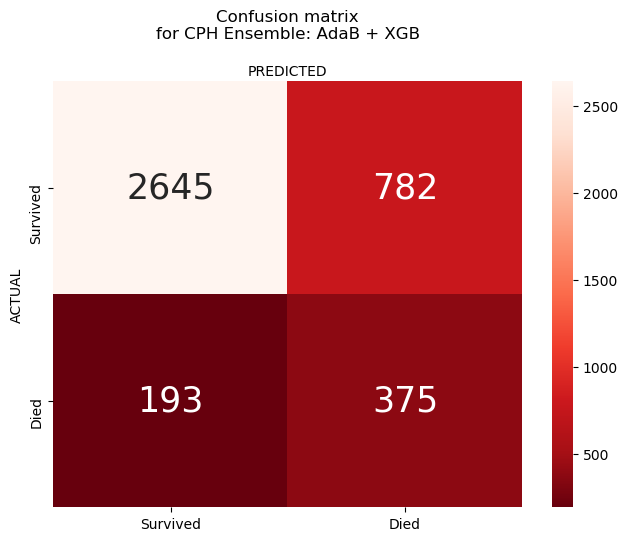

In [108]:
#Import library
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

#Select model
if (sel_choose == 'ld_intersection'):
    classifiers = [
#                     ('logR', LogisticRegression(max_iter=10000, C=10, penalty='l2', solver='lbfgs')), #ld #cph 
                    ('AdaB', AdaBoostClassifier()), 
                    ('XGB', XGB.XGBClassifier(max_depth=10, n_estimators=1000,  learning_rate=0.01, random_state=500, scale_pos_weight=1, subsample=0.5, colsample_bytree=0.5, n_jobs=-1))
                    #ld #cph
                  ]
    feature_choose = ld_intersection_choose
    
if (sel_choose == 'cph'):
    classifiers = [
#                     ('logR', LogisticRegression(max_iter=10000, C=10, penalty='l2', solver='lbfgs')), #ld #cph 
                    ('AdaB', AdaBoostClassifier()), 
                    ('XGB', XGB.XGBClassifier(max_depth=10, n_estimators=1000,  learning_rate=0.01, random_state=500, scale_pos_weight=1, subsample=0.5, colsample_bytree=0.5, n_jobs=-1))
                    #ld #cph
                  ]
    feature_choose = cph_choose

# classifiers = [
#     ('logR', LogisticRegression(max_iter=10000, C=10, penalty='l2', solver='lbfgs')), #ld #cph 
# #     ('logRCV', LogisticRegressionCV(cv=5, max_iter=10000, n_jobs=-1)),  
# #     ('PassiveAggressive', PassiveAggressiveClassifier()),     
# #     ('Ridge', RidgeClassifier()), 
# #     ('RidgeCV', RidgeClassifierCV(cv=5, n_jobs=-1)),
# #     ('SGD', SGDClassifier()), 
# #     ('Perceptron', Perceptron()),

# #     ('KNeighbors', KNeighborsClassifier(2)),

#     ('SVCrbf', SVC(kernel="rbf", C=0.025, probability=True)),
# #     ('SVCgamma', SVC(C=100, gamma='scale', probability=True)), 
    
# #     ('GaussianNB', GaussianNB()),

# #     ('DT', DecisionTreeClassifier(criterion='gini', random_state=500)),
# #     ('RF', RandomForestClassifier(n_estimators=200, criterion='gini', n_jobs=-1)),
#     ('AdaB', AdaBoostClassifier()), 
# #     ('AdaC', AdaCostClassifier(DecisionTreeClassifier(max_depth = 3), n_estimators=250, random_state=8, learning_rate=0.02))
# #     ('GB', GradientBoostingClassifier()), 

# #     ('XT', ExtraTreesClassifier(criterion='gini', n_jobs=-1)), 
#     ('XGB', XGB.XGBClassifier(max_depth=10, n_estimators=1000,  learning_rate=0.01, random_state=500, scale_pos_weight=1, subsample=0.5, colsample_bytree=0.5, n_jobs=-1))
#     #ld #cph
#             ]

#Model
ens_voting = VotingClassifier(estimators=classifiers, voting='soft', n_jobs=-1)

#Predict for Set B
ens_voting_fit = ens_voting.fit(X_train[feature_choose], y_train_new)
ens_voting_fit.predict(X_test[feature_choose])
plot_all(X_test=X_test_new[feature_choose], 
         y_test=y_test_new, 
         model_name=sel_choose.upper() + ' Ensemble: ' + " + ".join([x[0] for x in classifiers]),
         model_fit=ens_voting_fit, 
         feature=feature_choose,
         feature_name=sel_choose.upper(),
         samp=samp)


# # # #Predict for Set C
# ens_voting_fit = ens_voting.fit(X_train[feature_choose], y_train_new)
# ens_voting_fit.predict(X_unseen[feature_choose])
# plot_all(X_test=X_unseen[feature_choose], 
#          y_test=y_unseen, 
#          model_name=sel_choose.upper() + ' Ensemble: ' + " + ".join([x[0] for x in classifiers]),
#          model_fit=ens_voting_fit, 
#          feature=feature_choose,
#          feature_name=sel_choose.upper(),
#          samp=samp)


#Save model
import pickle
# # pickle.dump(ens_voting, open('ens_voting_' + sel_choose + '.pkl', 'wb')) 
pickle.dump(ens_voting_fit, open('model/ens_voting_fit_' + sel_choose + '.pkl', 'wb')) 

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,CPH,CPH Ensemble: AdaB + XGB,"StackingClassifier(cv=None,\n ...",75.7,32.7,67.3,44.0,80.76,43.5,0.34,2641,786,186,382


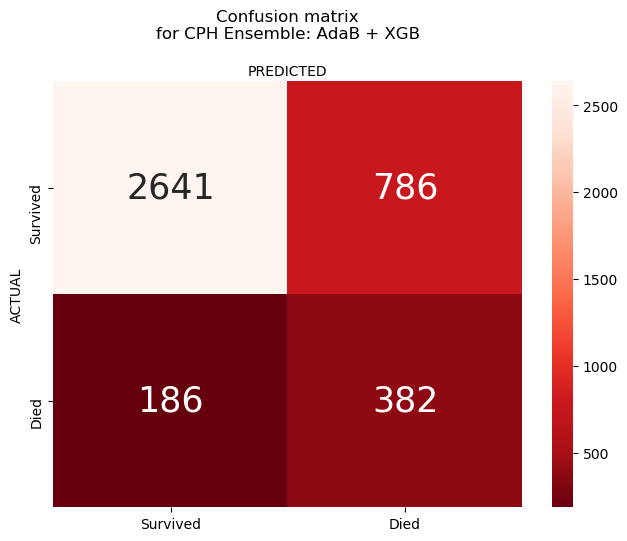

In [109]:
#Select model
if (sel_choose == 'ld_intersection'):
    classifiers = [
                    ('logR', LogisticRegression(max_iter=10000, C=10, penalty='l2', solver='lbfgs')), #ld #cph 
                    ('AdaB', AdaBoostClassifier()), 
                    ('XGB', XGB.XGBClassifier(max_depth=10, n_estimators=1000,  learning_rate=0.01, random_state=500, scale_pos_weight=1, subsample=0.5, colsample_bytree=0.5, n_jobs=-1))
                    #ld #cph
                  ]
    
if (sel_choose == 'cph'):
    classifiers = [
#                     ('logR', LogisticRegression(max_iter=10000, C=10, penalty='l2', solver='lbfgs')), #ld #cph 
                    ('AdaB', AdaBoostClassifier()), 
#                     ('XT', ExtraTreesClassifier(criterion='gini', n_jobs=-1)), 
                    ('XGB', XGB.XGBClassifier(max_depth=10, n_estimators=1000,  learning_rate=0.01, random_state=500, scale_pos_weight=1, subsample=0.5, colsample_bytree=0.5, n_jobs=-1))
                    #ld #cph
                  ]

#Model
ens_stacking = StackingClassifier(estimators=classifiers, n_jobs=-1)


#Predict for Set B
ens_stacking_fit = ens_stacking.fit(X_train[feature_choose], y_train_new)
ens_stacking_fit.predict(X_test[feature_choose])
plot_all(X_test=X_test[feature_choose], 
         y_test=y_test_new, 
         model_name=sel_choose.upper() + ' Ensemble: ' + " + ".join([x[0] for x in classifiers]),
         model_fit=ens_stacking_fit, 
         feature=feature_choose,
         feature_name=sel_choose.upper(),
         samp=samp)


# # # #Predict for Set C
# # ens_stacking_fit = ens_stacking.fit(X_train_new, y_train_new)
# # ens_stacking_fit.predict(X_unseen[X_train_new.columns])
# plot_all(X_test=X_unseen[X_train_new.columns], 
#          y_test=y_unseen, 
#          model_name=sel_choose.upper() + ' Ensemble: ' + " + ".join([x[0] for x in classifiers]),
#          model_fit=ens_stacking_fit, 
#          feature=feature_choose,
#          feature_name=sel_choose.upper(),
#          samp=samp)


#Save model
import pickle
# # pickle.dump(ens_stacking, open('ens_stacking_' + sel_choose + '.pkl', 'wb')) 
pickle.dump(ens_stacking_fit, open('model/ens_stacking_fit_' + sel_choose + '.pkl', 'wb')) 

In [ ]:
# Sensitivity = TP / (TP + FN)
# Precision (PPV) = TP / (TP + FP)
# minimum among Sensitivity (Recall) and PPV (Precision)

# Dataset          Event 1 score Event 2 score
#                  min(Se, PPV)  (H-Statistic)

#Journal (https://physionet.org/files/challenge-2012/1.0.0/papers/0493.pdf)
# set-a (training) 0.4404        17.2626
# set-b (test)     0.4436        45.4347
# set-c (test)     0.4512        45.0101

# Top entry        0.5353        17.88
# Last of top      0.4513        51.69
# SAPS-I           0.3125        35.21
# Random           0.139         10137.7

## 5.4 K-Folds Cross-Validation

In [110]:
#Import library
from numpy import interp
from sklearn import model_selection
from sklearn.metrics import auc, plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

ens_new = ens_stacking

#Plot all AUC and display metrics
def plot_all_auc(X, 
                 y, 
                 cv_num=5,
                 sel_choose=cph_choose,
                 classifier=ens_new,
                 samp=samp
                ):
    
    #K-Folds
    cv = StratifiedKFold(n_splits=cv_num, random_state=500, shuffle=True)
    
    #Set display
#     plt.figure(figsize=(40, 30))
    
    #Select features
    X = X[sel_choose]
    model_name = 'Ensemble: ' + " + ".join([x[0] for x in classifier.estimators])

#Plot AUC-ROC and AUC-PR for K-Folds Cross-Validation
# https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
# def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    """
    Draw a Cross Validated ROC Curve.
    Keyword Args:
        classifier: Classifier Object
        cv: StratifiedKFold Object: (https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation)
        X: Feature Pandas DataFrame
        y: Response Pandas Series
    Example largely taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
    """
    # Creating ROC Curve with Cross Validation
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))

        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC\nfor ' + model_name)
    plt.legend(loc="lower right")
    plt.show()


# def draw_cv_pr_curve(classifier, cv, X, y, title='PR Curve'):
    """
    Draw a Cross Validated PR Curve.
    Keyword Args:
        classifier: Classifier Object
        cv: StratifiedKFold Object: (https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation)
        X: Feature Pandas DataFrame
        y: Response Pandas Series

    Largely taken from: https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
    """
    y_real = []
    y_proba = []

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        precision, recall, _ = precision_recall_curve(y.iloc[test], probas_[:, 1])

        # Plotting each individual PR Curve
        plt.plot(recall, precision, lw=1, alpha=0.3,
                 label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y.iloc[test], probas_[:, 1])))

        y_real.append(y.iloc[test])
        y_proba.append(probas_[:, 1])

        i += 1

    plt.plot([1, 0], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
        
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)

    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    plt.plot(recall, precision, color='b',
             label=r'Precision-Recall (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
             lw=2, alpha=.8)  

    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('AUC-PR\nfor ' + model_name)
    plt.legend(loc="lower left")
    plt.show()

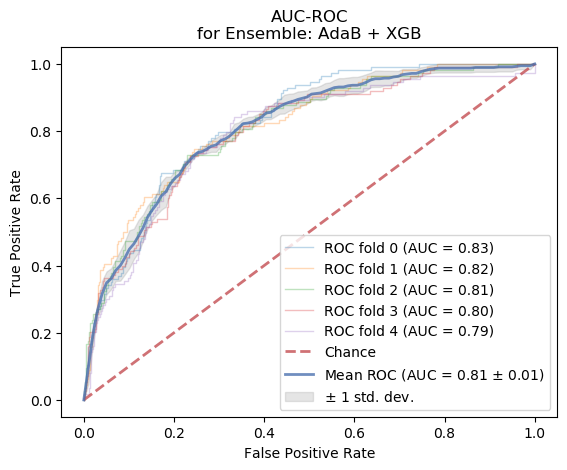

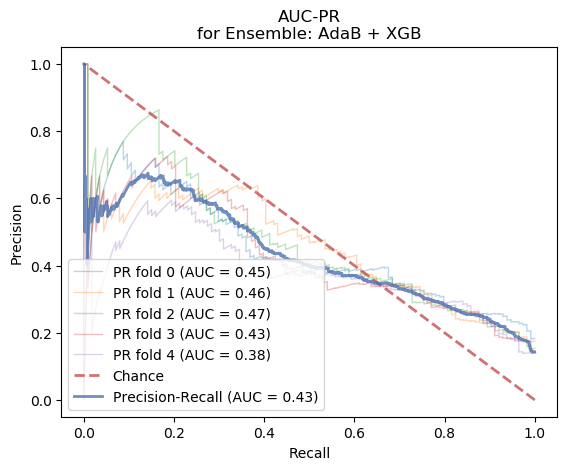

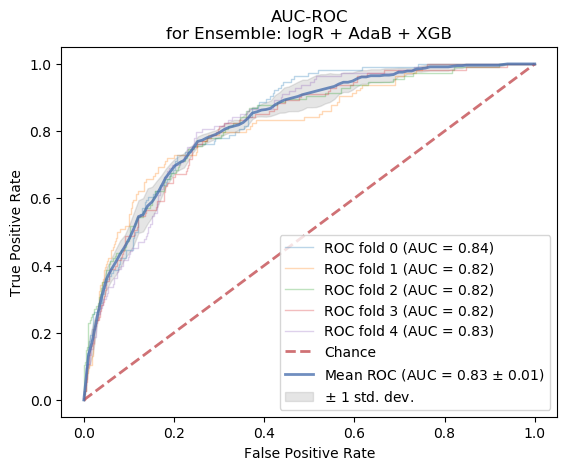

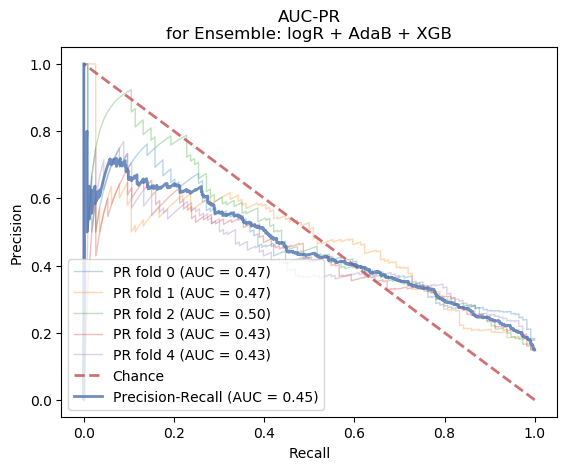

In [114]:
import pickle
ens_voting_fit_ld_intersection = pickle.load(open('model/' + 'ens_voting_fit_ld_intersection.pkl', 'rb'))
# ens_voting_ld.estimators_

ens_stacking_fit_ld_intersection = pickle.load(open('model/' + 'ens_stacking_fit_ld_intersection.pkl', 'rb'))

#Voting new
plot_all_auc(X_test, y_test, sel_choose=ld_intersection_choose, classifier=ens_voting_fit_ld_intersection, samp=samp)
plot_all_auc(X_test, y_test, sel_choose=ld_intersection_choose, classifier=ens_stacking_fit_ld_intersection, samp=samp)

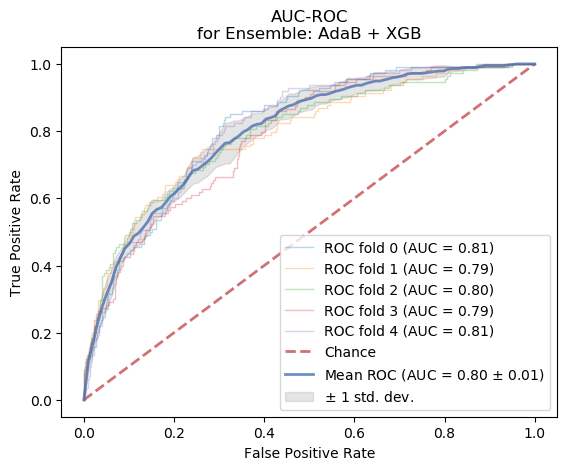

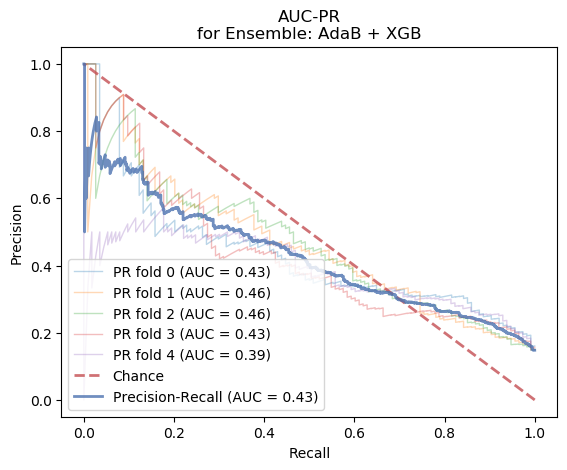

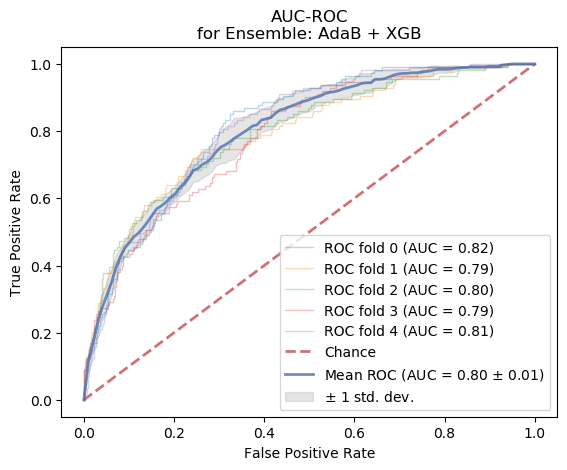

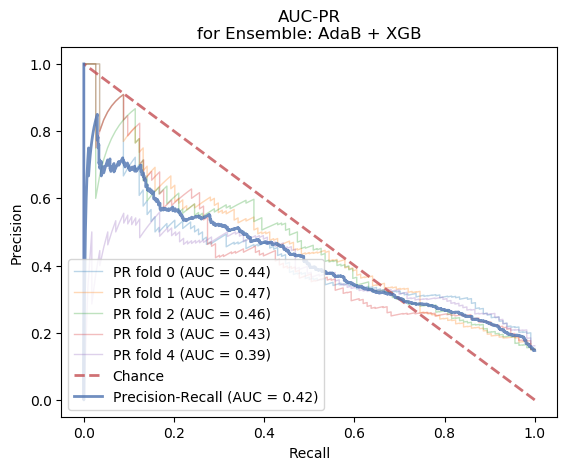

In [115]:
import pickle
ens_voting_fit_cph = pickle.load(open('model/' + 'ens_voting_fit_cph.pkl', 'rb'))
# ens_voting_ld.estimators_

ens_stacking_fit_cph = pickle.load(open('model/' + 'ens_stacking_fit_cph.pkl', 'rb'))

plot_all_auc(X_test, y_test, sel_choose=cph_choose, classifier=ens_voting_fit_cph, samp=samp)
plot_all_auc(X_test, y_test, sel_choose=cph_choose, classifier=ens_stacking_fit_cph, samp=samp)

# 6 Unseen

## 6.1 Unseen data

In [116]:
pd.concat({'Train': pd.DataFrame(y_train.value_counts()),
           'Test': pd.DataFrame(y_test.value_counts()),
           'Unseen': pd.DataFrame(y_unseen.value_counts())
          }, axis=1)

,Train,Test,Unseen
,Inhospitaldeathmax,Inhospitaldeathmax,Inhospitaldeathmax
0,1950,3427,3411
1,553,568,585


In [117]:
#Display confusion matrix
tn, fp, fn, tp = confusion_matrix(y_unseen, ens_stacking_fit_cph.predict(X_unseen[cph_choose]), labels=[0, 1]).ravel()

display({'TN': tn, 
         'FP': fp, 
         'FN': fn, 
         'TP': tp})

display(round(recall_score(y_unseen, ens_stacking_fit_cph.predict(X_unseen[cph_choose]))*100,2))

{'TN': 3343, 'FP': 68, 'FN': 484, 'TP': 101}

17.26

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,All,Ensemble: AdaB + XGB,"VotingClassifier(estimators=[('AdaB',\n ...",83.1,43.9,54.7,48.7,81.54,45.11,0.39,3002,409,265,320


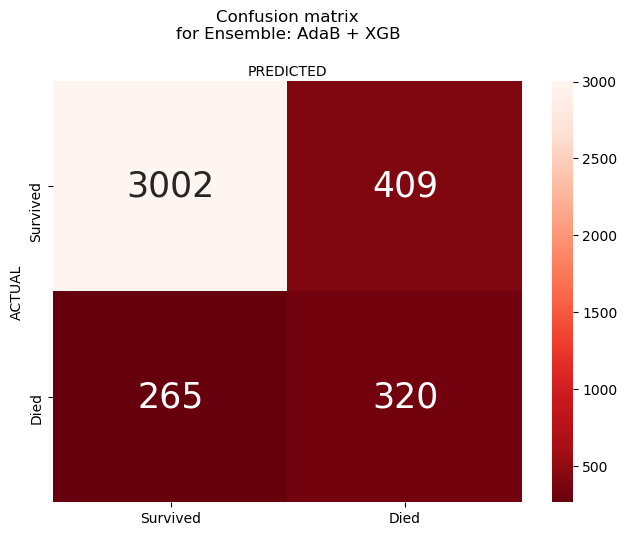

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,All,Ensemble: logR + AdaB + XGB,"StackingClassifier(cv=None,\n ...",82.0,41.6,56.9,48.1,81.96,46.02,0.38,2943,468,252,333


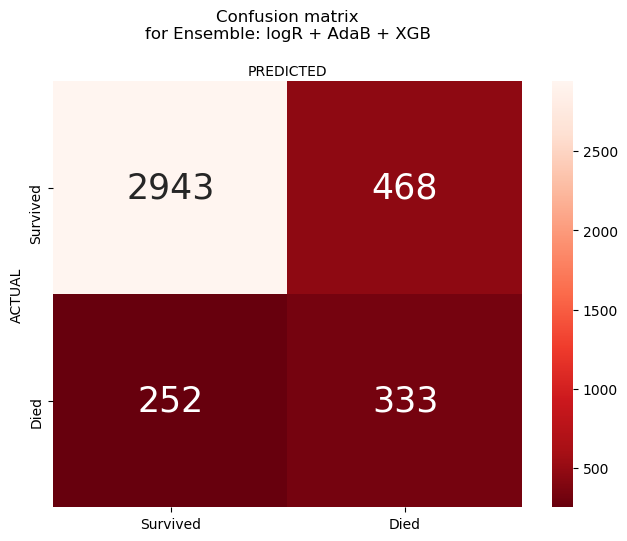

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,All,Ensemble: AdaB + XGB,"VotingClassifier(estimators=[('AdaB',\n ...",74.6,32.6,68.5,44.2,79.65,42.1,0.34,2581,830,184,401


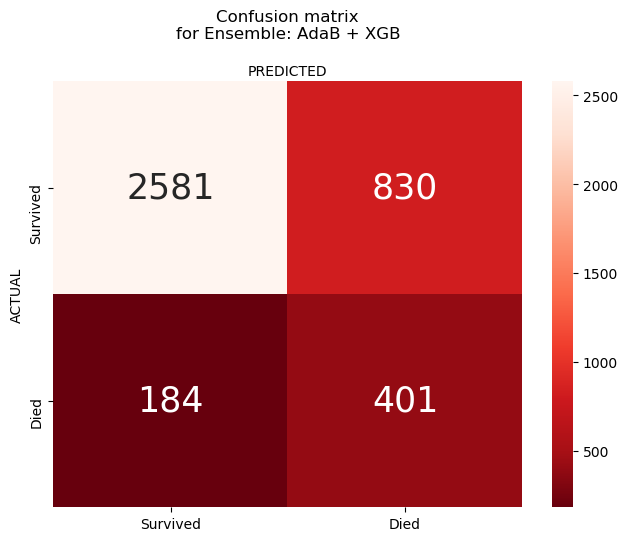

,Sampling,Feature,Model Name,Model Parameters,Accuracy,Precision,Recall,F1,AUCROC,Average Precision Score,Matthews Correlation Coefficient,True Negatives,False Positives,False Negatives,True Positives
0,Undersampling,All,Ensemble: AdaB + XGB,"StackingClassifier(cv=None,\n ...",74.5,32.5,69.1,44.2,79.66,42.99,0.34,2572,839,181,404


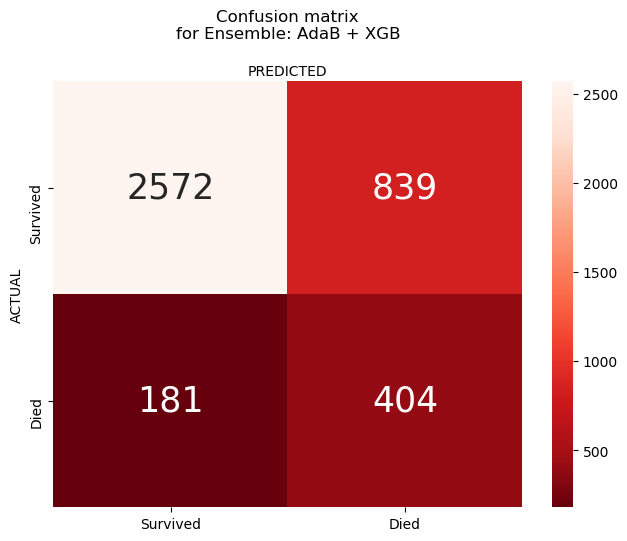

In [119]:
#Load model
import pickle
ens_voting_fit_ld_intersection = pickle.load(open('model/' + 'ens_voting_fit_ld_intersection.pkl', 'rb'))
# ens_voting_ld.estimators_
ens_stacking_fit_ld_intersection = pickle.load(open('model/' + 'ens_stacking_fit_ld_intersection.pkl', 'rb'))

ens_voting_fit_cph = pickle.load(open('model/' + 'ens_voting_fit_cph.pkl', 'rb'))
ens_stacking_fit_cph = pickle.load(open('model/' + 'ens_stacking_fit_cph.pkl', 'rb'))


#Generate confusion matrix for LD
final_clfs = [ens_voting_fit_ld_intersection, ens_stacking_fit_ld_intersection] 

for final_clf in final_clfs:
    plot_all(X_unseen[ld_intersection_choose], y_unseen, 'Ensemble: ' + " + ".join([x[0] for x in final_clf.estimators]), final_clf, samp=samp, feature='LD_intersection')
    
#Generate confusion matrix for CPH
final_clfs = [ens_voting_fit_cph, ens_stacking_fit_cph]
for final_clf in final_clfs:
    plot_all(X_unseen[cph_choose], y_unseen, 'Ensemble: ' + " + ".join([x[0] for x in final_clf.estimators]), final_clf, samp=samp, feature='CPH')

## 6.2 Explaining model

In [ ]:
# import lime
# import lime.lime_tabular

# #Select dataframe
# # X = X_train[cph_choose]
# # y = y_train
# X = X_unseen[cph_choose]
# y = y_unseen
# Xt = X_unseen[cph_choose]

# #Extract probability
# predict_fn_logR = lambda x: logR.fit(X, y).predict_proba(x).astype(float)
# predict_fn_DT = lambda x: DT.fit(X, y).predict_proba(x).astype(float)
# predict_fn_ens = lambda x: ens_voting_fit_cph.fit(X, y).predict_proba(x).astype(float)

# #Extract columns
# feature_names_cat = X.select_dtypes('uint8').columns
# feature_names_float = X.select_dtypes('float').columns
# # feature_names_int = X.select_dtypes('int').columns

# #Extract columns and columns
# features_names = feature_names_cat.append(feature_names_float).to_list()
# categorical_names = feature_names_cat.to_list()
# categorical_features = X.iloc[:, X_train[cph_choose].columns.get_loc(X_train[cph_choose].select_dtypes('uint8').columns[0]):]

# #Convert to numpy
# X = X.to_numpy()
# y = y.to_numpy()

# Xt = Xt.to_numpy()

# #LIME
# explainer = lime.lime_tabular.LimeTabularExplainer(X, 
#                                                    mode='classification', 
#                                                    training_labels=y, 
#                                                    feature_names=features_names,
#                                                    class_names=['Survived', 'Died'],
#                                                    categorical_features=categorical_features,
#                                                    categorical_names=categorical_names
#                                                   )

# #Select row data 
# row_num = 0

# # explainer.explain_instance(Xt[row_num], predict_fn_DT, num_features=30).show_in_notebook(show_all=False)
# # explainer.explain_instance(Xt[row_num], predict_fn_logR, num_features=30).show_in_notebook(show_all=False)
# explainer.explain_instance(Xt[row_num], predict_fn_ens, num_features=30).show_in_notebook(show_all=False)


In [134]:
#Identify features
pd.merge(pd.DataFrame({'LD': ld_intersection_choose}), pd.DataFrame({'CPH': cph_choose}), left_on='LD', right_on='CPH', how='outer', indicator=True).sort_values('_merge')

,LD,CPH,_merge
17,Tachycardia1,NaN,left_only
14,MechVentmax1,NaN,left_only
2,HCO3median,NaN,left_only
3,Albuminmedian,NaN,left_only
19,Hypertension1,NaN,left_only
6,Glucosemedian,NaN,left_only
21,RenalInjury1,NaN,left_only
16,Genderfirst1,NaN,left_only
9,pHmedian,NaN,left_only
10,SaO2median,NaN,left_only
